# IE48B Homework 1
## Gesture Recognition
### Ömer Yiğit Yıldırım

8 different shapes are drawn in three dimensions for many times by the testers and the task is to observe the data in 3 dimensions and come up with different time series representations to simplify this complicated data of accelerations in 3 dimensions and find a way of classification. 
    
In this very first step I have converted the data to a format that I can observe and work on it.



In [1]:
require(data.table)
require(ggplot2)
require(repr)


options(repr.plot.width=15, repr.plot.height=8)
# assuming you have the data folder in your working directory in the following format:
# 'working_directory/ClassificationData/dataset_name/'
current_folder=getwd()
dataset='UWave'
dataset1='uWaveGestureLibrary'
datasetx= 'X'
datasety= 'Y'
datasetz= 'Z'

train_data_path_x=sprintf('%s/ClassificationData/%s/%s_%s_TRAIN.txt',current_folder,dataset,dataset1,datasetx)
train_data_path_y=sprintf('%s/ClassificationData/%s/%s_%s_TRAIN.txt',current_folder,dataset,dataset1,datasety)
train_data_path_z=sprintf('%s/ClassificationData/%s/%s_%s_TRAIN.txt',current_folder,dataset,dataset1,datasetz)

train_data_x=fread(train_data_path_x)
train_data_y=fread(train_data_path_y)
train_data_z=fread(train_data_path_z)

head(train_data_x)

Loading required package: data.table
Loading required package: data.table
Loading required package: ggplot2
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: repr
Loading required package: repr


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316
6,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,-0.304243210,...,-0.7964140,-0.7417282,-0.6946985,-0.6476688,-0.6476688,-0.64766875,-0.64766875,-0.64766875,-0.64766875,-0.64766875
5,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,1.627311100,...,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.2376337,-0.23763371,-0.23763371,-0.23763371,-0.23763371,-0.23763371
5,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,0.661276530,...,-0.2820107,-0.2369291,-0.1918477,-0.1467662,-0.1016848,-0.06120346,-0.05663826,-0.05546207,-0.05546207,-0.05546207
3,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,0.005184784,...,1.2072899,1.1478218,1.0943436,1.0603618,1.0531583,1.04446710,1.01898080,0.90994938,0.79101316,0.67207694
4,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,1.286197800,...,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.4369826,-1.44034250,-1.45251250,-1.46844580,-1.48437920,-1.50031250
8,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,-0.479252460,...,0.5784697,0.5877041,0.5969386,0.6061730,0.6207059,0.63523879,0.65370767,0.67217655,0.69064543,0.70911432


First we name the column which indicates the classes and add a time column. 

In [2]:
# We will work with long format for easier visualization and analysis
# first add id variable (data.table notation)
# and rename column name "V1" with "class"
#sort based on class first
setnames(train_data_x,'V1','class')
train_data_x=train_data_x[order(class)]
train_data_x[,class:=as.character(class)]
train_data_x[,id:=1:.N]

setnames(train_data_y,'V1','class')
train_data_y=train_data_y[order(class)]
train_data_y[,class:=as.character(class)]
train_data_y[,id:=1:.N]

setnames(train_data_z,'V1','class')
train_data_z=train_data_z[order(class)]
train_data_z[,class:=as.character(class)]
train_data_z[,id:=1:.N]
# check
head(train_data_x)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V308,V309,V310,V311,V312,V313,V314,V315,V316,id
1,-0.7914472,-0.7914472,-0.7958727,-0.8100650,-0.8492300,-0.9034648,-0.9311463,-0.9506034,-0.9506034,...,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,1
1,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,...,-0.64228850,-0.59668832,-0.54541065,-0.51043787,-0.48153849,-0.45589969,-0.45097050,-0.44960244,-0.44960244,2
1,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,...,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,3
1,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,...,0.27569795,0.25692066,0.23814336,0.21936607,0.20058877,0.18181143,0.16303409,0.14425675,0.12547941,4
1,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,...,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,5
1,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,...,0.45357809,0.46952605,0.46952605,0.46952605,0.46952605,0.47339842,0.49184322,0.53073887,0.56963450,6


class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V308,V309,V310,V311,V312,V313,V314,V315,V316,id
1,-0.7914472,-0.7914472,-0.7958727,-0.8100650,-0.8492300,-0.9034648,-0.9311463,-0.9506034,-0.9506034,...,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,0.08391307,1
1,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,-0.4496024,...,-0.64228850,-0.59668832,-0.54541065,-0.51043787,-0.48153849,-0.45589969,-0.45097050,-0.44960244,-0.44960244,2
1,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,-0.1874689,...,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,0.53626304,3
1,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,0.3014817,...,0.27569795,0.25692066,0.23814336,0.21936607,0.20058877,0.18181143,0.16303409,0.14425675,0.12547941,4
1,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,0.1632022,...,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,-0.17307817,5
1,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,-0.9319900,...,0.45357809,0.46952605,0.46952605,0.46952605,0.46952605,0.47339842,0.49184322,0.53073887,0.56963450,6


You can see that the data for those three dimensions: x,y and z, are seperated I have changed their type to long format and combined them together in the same list in order to plot it. 

In [3]:
# melt the data for long format
long_train_x=melt(train_data_x,id.vars=c('id','class'))


long_train_y=melt(train_data_y,id.vars=c('id','class'))


long_train_z=melt(train_data_z,id.vars=c('id','class'))


# need to get numerical part of the variable (represents time)
# using gsub to set the nonnumerical part to zero length
long_train_x[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train_y[,time:=as.numeric(gsub("\\D", "", variable))-1]

long_train_z[,time:=as.numeric(gsub("\\D", "", variable))-1]

# check
head(long_train_x)

# remove variable
long_train_x=long_train_x[,list(id,class,time,value)]
long_train_x=long_train_x[order(id,time)]

long_train_y=long_train_y[,list(id,class,time,value)]
long_train_y=long_train_y[order(id,time)]

long_train_z=long_train_z[,list(id,class,time,value)]
long_train_z=long_train_z[order(id,time)]
# check
head(long_train_x)
head(long_train_y)
head(long_train_z)

id,class,variable,value,time
1,1,V2,-0.7914472,1
2,1,V2,-0.4496024,1
3,1,V2,-0.1874689,1
4,1,V2,0.3014817,1
5,1,V2,0.1632022,1
6,1,V2,-0.9319900,1


id,class,variable,value,time
1,1,V2,-0.7914472,1
2,1,V2,-0.4496024,1
3,1,V2,-0.1874689,1
4,1,V2,0.3014817,1
5,1,V2,0.1632022,1
6,1,V2,-0.9319900,1


id,class,time,value
1,1,1,-0.7914472
1,1,2,-0.7914472
1,1,3,-0.7958727
1,1,4,-0.8100650
1,1,5,-0.8492300
1,1,6,-0.9034648


id,class,time,value
1,1,1,-0.7914472
1,1,2,-0.7914472
1,1,3,-0.7958727
1,1,4,-0.8100650
1,1,5,-0.8492300
1,1,6,-0.9034648


id,class,time,value
1,1,1,-1.959984
1,1,2,-1.959984
1,1,3,-1.956600
1,1,4,-1.945750
1,1,5,-1.915809
1,1,6,-1.874347


id,class,time,value
1,1,1,-1.959984
1,1,2,-1.959984
1,1,3,-1.956600
1,1,4,-1.945750
1,1,5,-1.915809
1,1,6,-1.874347


id,class,time,value
1,1,1,-0.2490781
1,1,2,-0.2490781
1,1,3,-0.2514390
1,1,4,-0.2590101
1,1,5,-0.2799033
1,1,6,-0.3088358


id,class,time,value
1,1,1,-0.2490781
1,1,2,-0.2490781
1,1,3,-0.2514390
1,1,4,-0.2590101
1,1,5,-0.2799033
1,1,6,-0.3088358


In [4]:
#setnames(train_data_x,'value','x_value')
#setnames(train_data_y,'value','value1')
#setnames(train_data_z,'value','value2')
long_train_x[,y_value:=long_train_y$value]
long_train_x[,z_value:=long_train_z$value]
setnames(long_train_x,'value','x_value')
long_train=long_train_x
head(long_train)


id,class,time,x_value,y_value,z_value
1,1,1,-0.7914472,-1.959984,-0.2490781
1,1,2,-0.7914472,-1.959984,-0.2490781
1,1,3,-0.7958727,-1.956600,-0.2514390
1,1,4,-0.8100650,-1.945750,-0.2590101
1,1,5,-0.8492300,-1.915809,-0.2799033
1,1,6,-0.9034648,-1.874347,-0.3088358


id,class,time,x_value,y_value,z_value
1,1,1,-0.7914472,-1.959984,-0.2490781
1,1,2,-0.7914472,-1.959984,-0.2490781
1,1,3,-0.7958727,-1.956600,-0.2514390
1,1,4,-0.8100650,-1.945750,-0.2590101
1,1,5,-0.8492300,-1.915809,-0.2799033
1,1,6,-0.9034648,-1.874347,-0.3088358


Now our list is combined and we are ready to visualize one instances for all classes. To find where the instances of different classes are, I have splitted the list for different classes. And then took the first instance of each class which are first 315 data points of each list.

In [5]:
split_list <- split(long_train,long_train$class)
split_list

id,class,time,x_value,y_value,z_value
1,1,1,-0.7914472,-1.959984,-0.2490781
1,1,2,-0.7914472,-1.959984,-0.2490781
1,1,3,-0.7958727,-1.956600,-0.2514390
1,1,4,-0.8100650,-1.945750,-0.2590101
1,1,5,-0.8492300,-1.915809,-0.2799033
1,1,6,-0.9034648,-1.874347,-0.3088358
1,1,7,-0.9311463,-1.853184,-0.3236030
1,1,8,-0.9506034,-1.838310,-0.3339827
1,1,9,-0.9506034,-1.838310,-0.3339827
1,1,10,-0.9506034,-1.838310,-0.3339827


id,class,time,x_value,y_value,z_value
1,1,1,-0.7914472,-1.959984,-0.2490781
1,1,2,-0.7914472,-1.959984,-0.2490781
1,1,3,-0.7958727,-1.956600,-0.2514390
1,1,4,-0.8100650,-1.945750,-0.2590101
1,1,5,-0.8492300,-1.915809,-0.2799033
1,1,6,-0.9034648,-1.874347,-0.3088358
1,1,7,-0.9311463,-1.853184,-0.3236030
1,1,8,-0.9506034,-1.838310,-0.3339827
1,1,9,-0.9506034,-1.838310,-0.3339827
1,1,10,-0.9506034,-1.838310,-0.3339827


In [6]:
class_1 <- split_list[[1]]
class_2 <- split_list[[2]]
class_3 <- split_list[[3]]
class_4 <- split_list[[4]]
class_5 <- split_list[[5]]
class_6 <- split_list[[6]]
class_7 <- split_list[[7]]
class_8 <- split_list[[8]]

In [7]:
class_1_1 <- head(class_1, n=315)
class_2_1 <- head(class_2, n=315)
class_3_1 <- head(class_3, n=315)
class_4_1 <- head(class_4, n=315)
class_5_1 <- head(class_5, n=315)
class_6_1 <- head(class_6, n=315)
class_7_1 <- head(class_7, n=315)
class_8_1 <- head(class_8, n=315)


Now they are ready to be visualized. I have used scatterplot3d to see them. However, visualizing acceleration may not grant many information so we took the cumulative sum of the columns where the acceleration data is restored. and then plot it.

In [10]:
install.packages("scatterplot3d", repos='http://cran.us.r-project.org')
require(scatterplot3d)

package 'scatterplot3d' successfully unpacked and MD5 sums checked
package 'scatterplot3d' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\omery\AppData\Local\Temp\RtmpmUBtoh\downloaded_packages

The downloaded binary packages are in
	C:\Users\omery\AppData\Local\Temp\RtmpmUBtoh\downloaded_packages


Loading required package: scatterplot3d
Loading required package: scatterplot3d


In [11]:
class_1_1[,"x_velocity"] <- cumsum(class_1_1$x_value)
class_1_1[,"y_velocity"] <- cumsum(class_1_1$y_value)
class_1_1[,"z_velocity"] <- cumsum(class_1_1$z_value)

class_2_1[,"x_velocity"] <- cumsum(class_2_1$x_value)
class_2_1[,"y_velocity"] <- cumsum(class_2_1$y_value)
class_2_1[,"z_velocity"] <- cumsum(class_2_1$z_value)

class_3_1[,"x_velocity"] <- cumsum(class_3_1$x_value)
class_3_1[,"y_velocity"] <- cumsum(class_3_1$y_value)
class_3_1[,"z_velocity"] <- cumsum(class_3_1$z_value)


class_4_1[,"x_velocity"] <- cumsum(class_4_1$x_value)
class_4_1[,"y_velocity"] <- cumsum(class_4_1$y_value)
class_4_1[,"z_velocity"] <- cumsum(class_4_1$z_value)


class_5_1[,"x_velocity"] <- cumsum(class_5_1$x_value)
class_5_1[,"y_velocity"] <- cumsum(class_5_1$y_value)
class_5_1[,"z_velocity"] <- cumsum(class_5_1$z_value)


class_6_1[,"x_velocity"] <- cumsum(class_6_1$x_value)
class_6_1[,"y_velocity"] <- cumsum(class_6_1$y_value)
class_6_1[,"z_velocity"] <- cumsum(class_6_1$z_value)


class_7_1[,"x_velocity"] <- cumsum(class_7_1$x_value)
class_7_1[,"y_velocity"] <- cumsum(class_7_1$y_value)
class_7_1[,"z_velocity"] <- cumsum(class_7_1$z_value)


class_8_1[,"x_velocity"] <- cumsum(class_8_1$x_value)
class_8_1[,"y_velocity"] <- cumsum(class_8_1$y_value)
class_8_1[,"z_velocity"] <- cumsum(class_8_1$z_value)

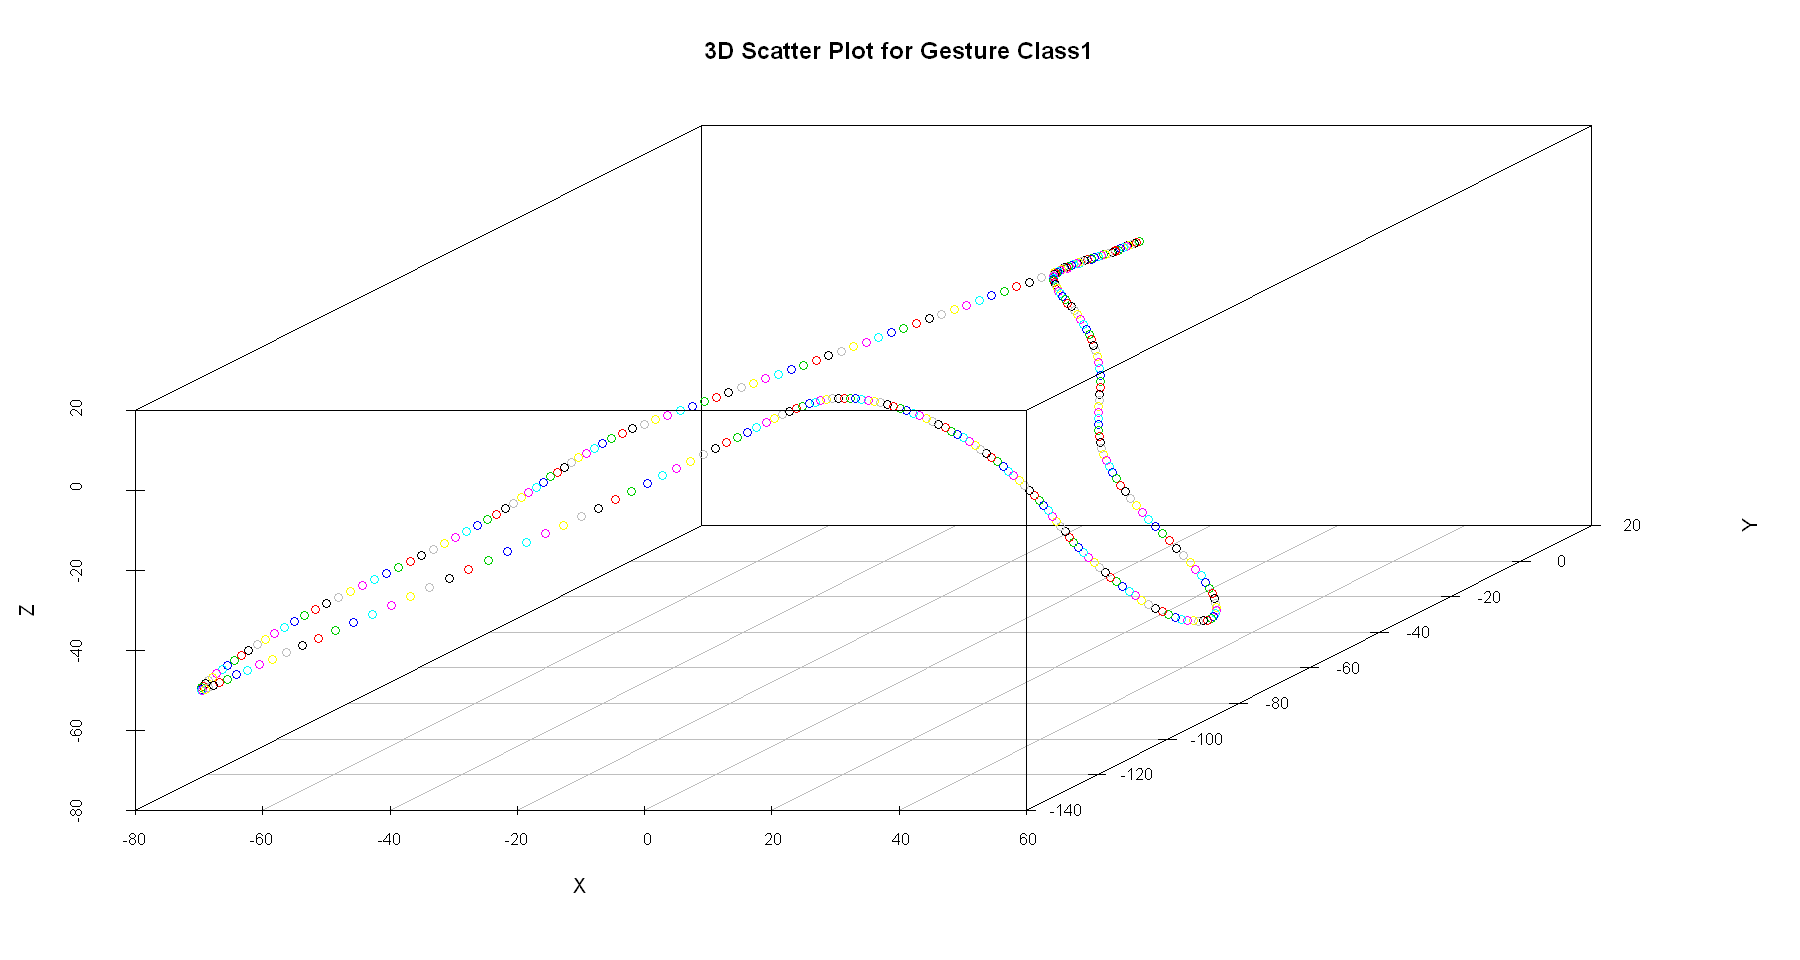

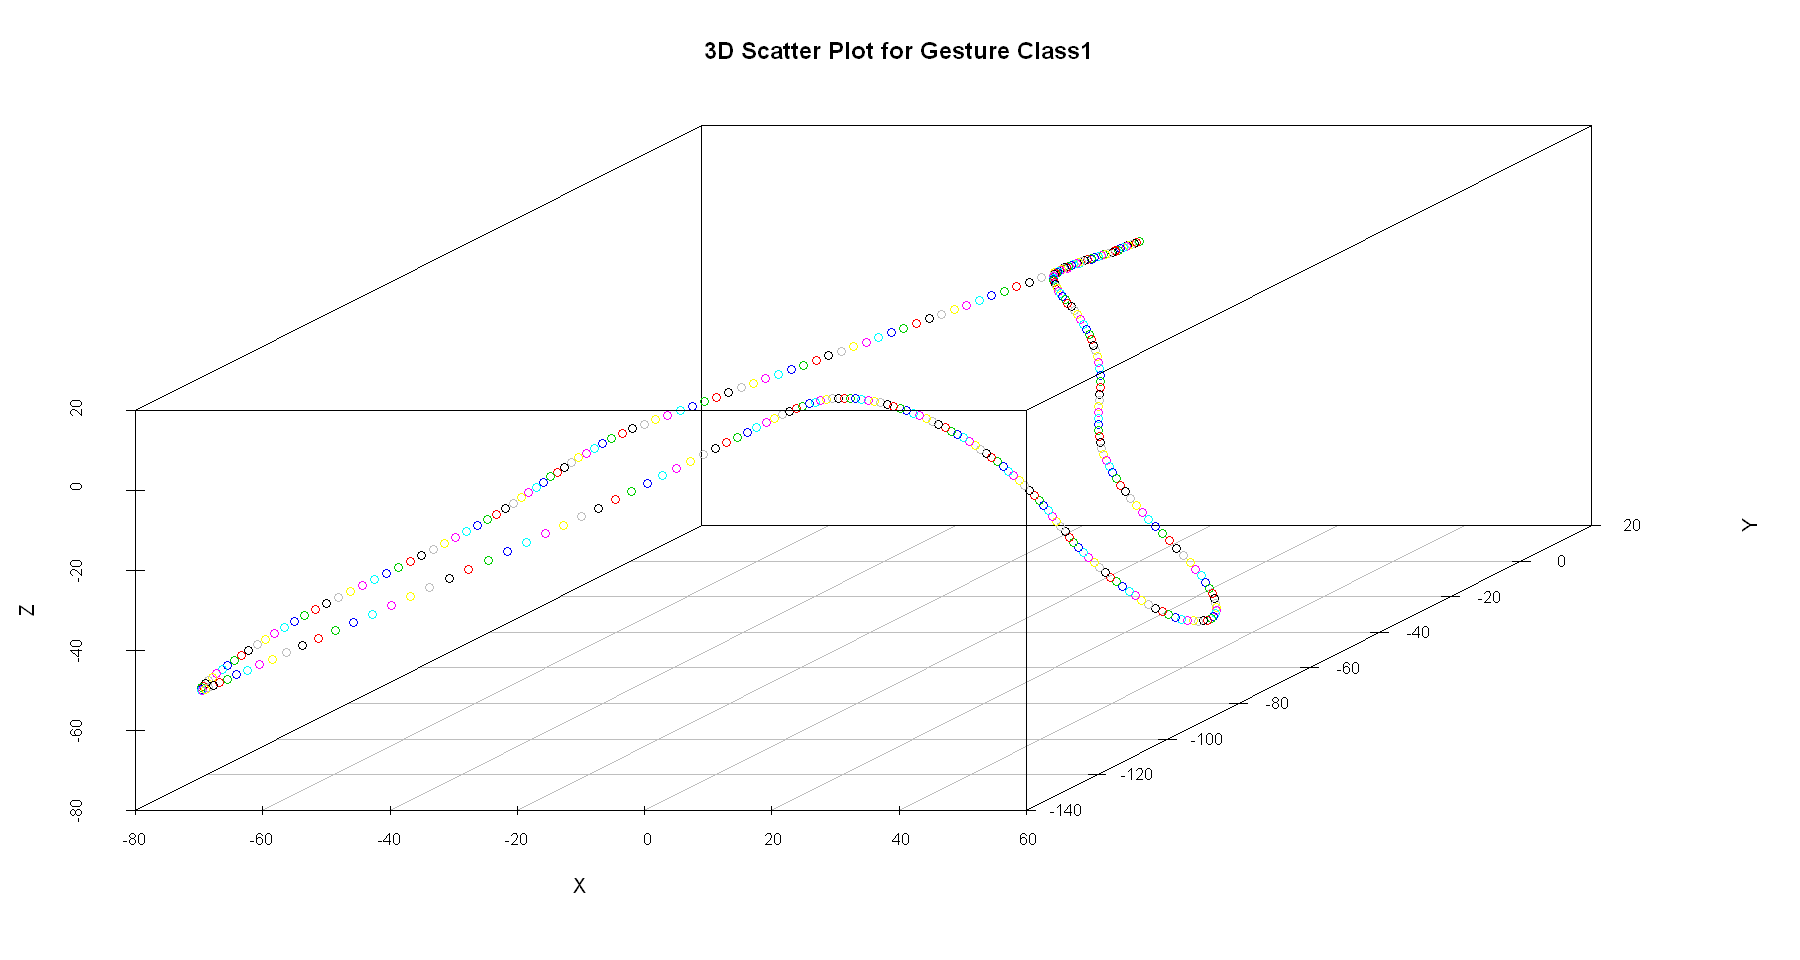

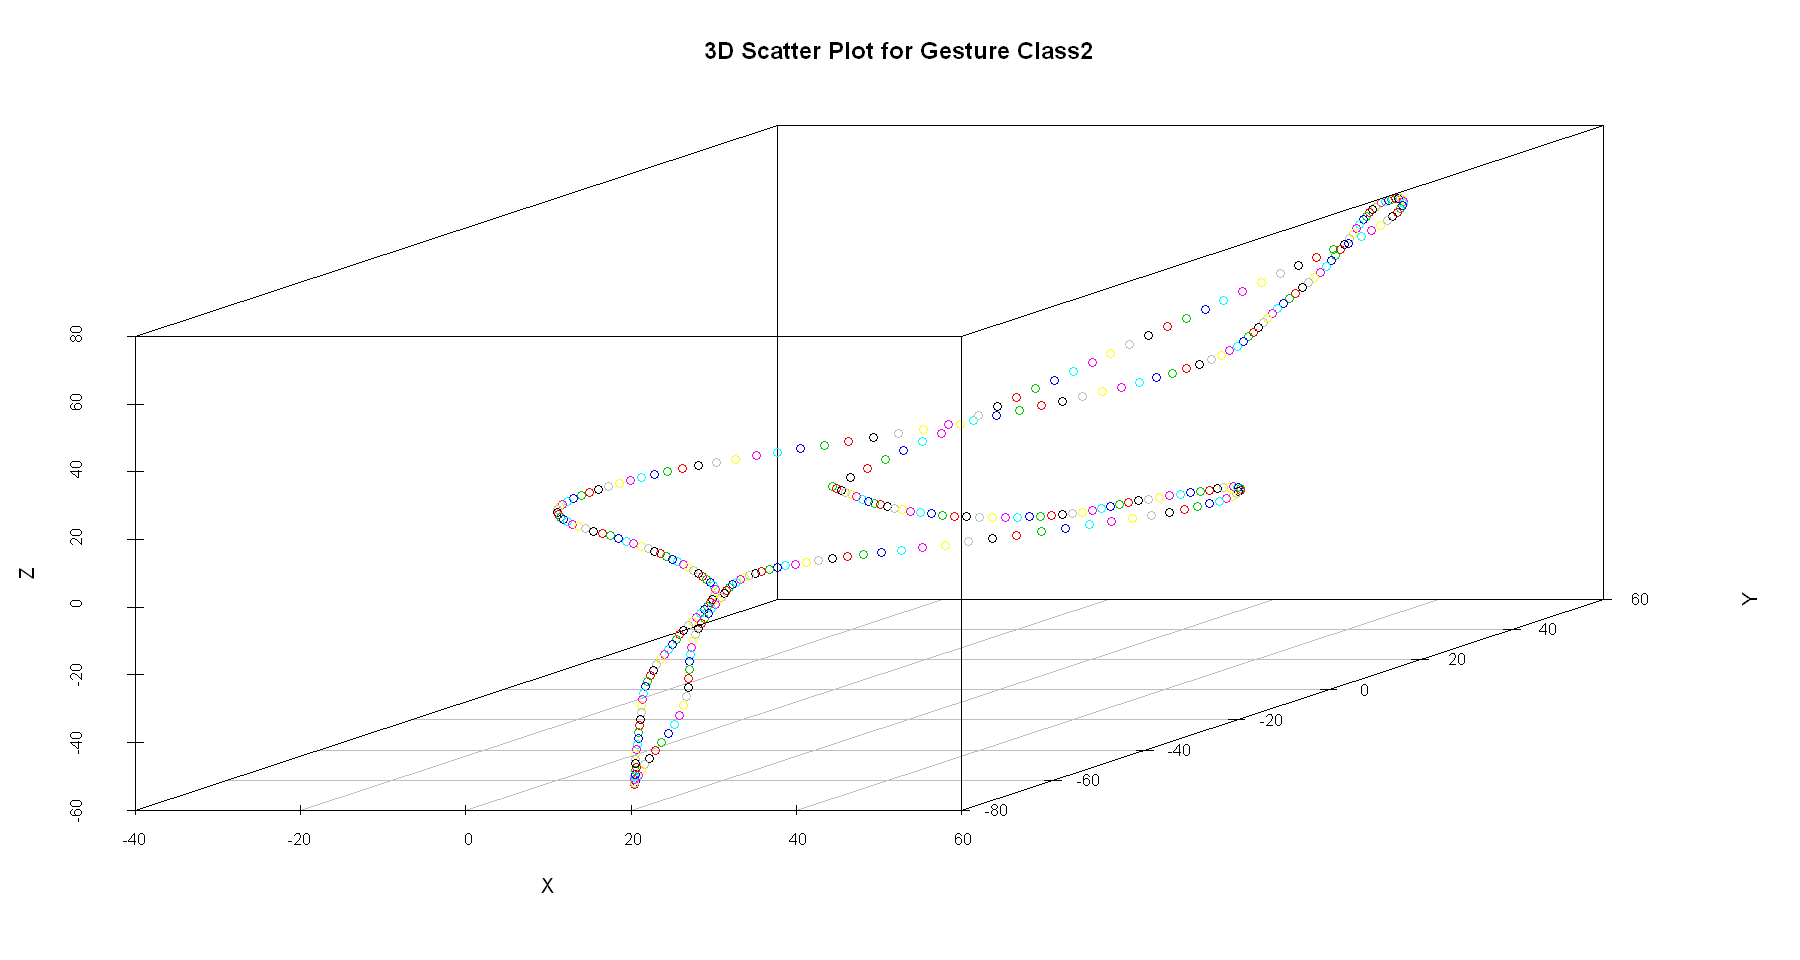

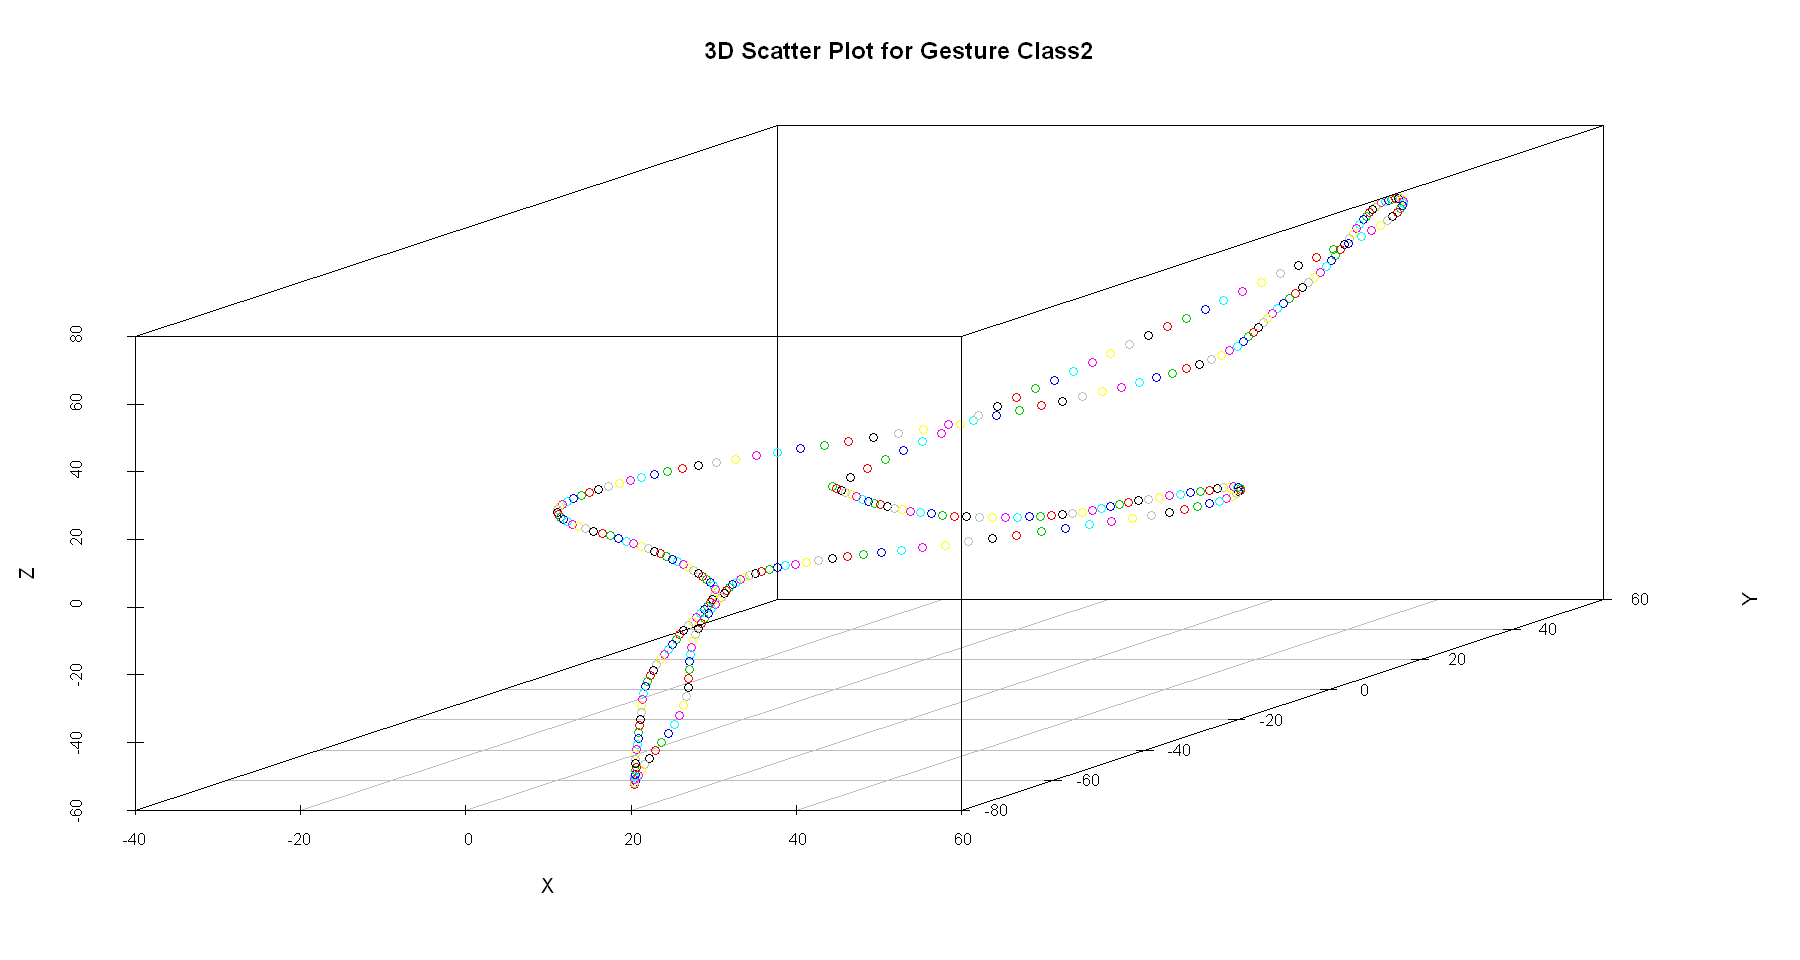

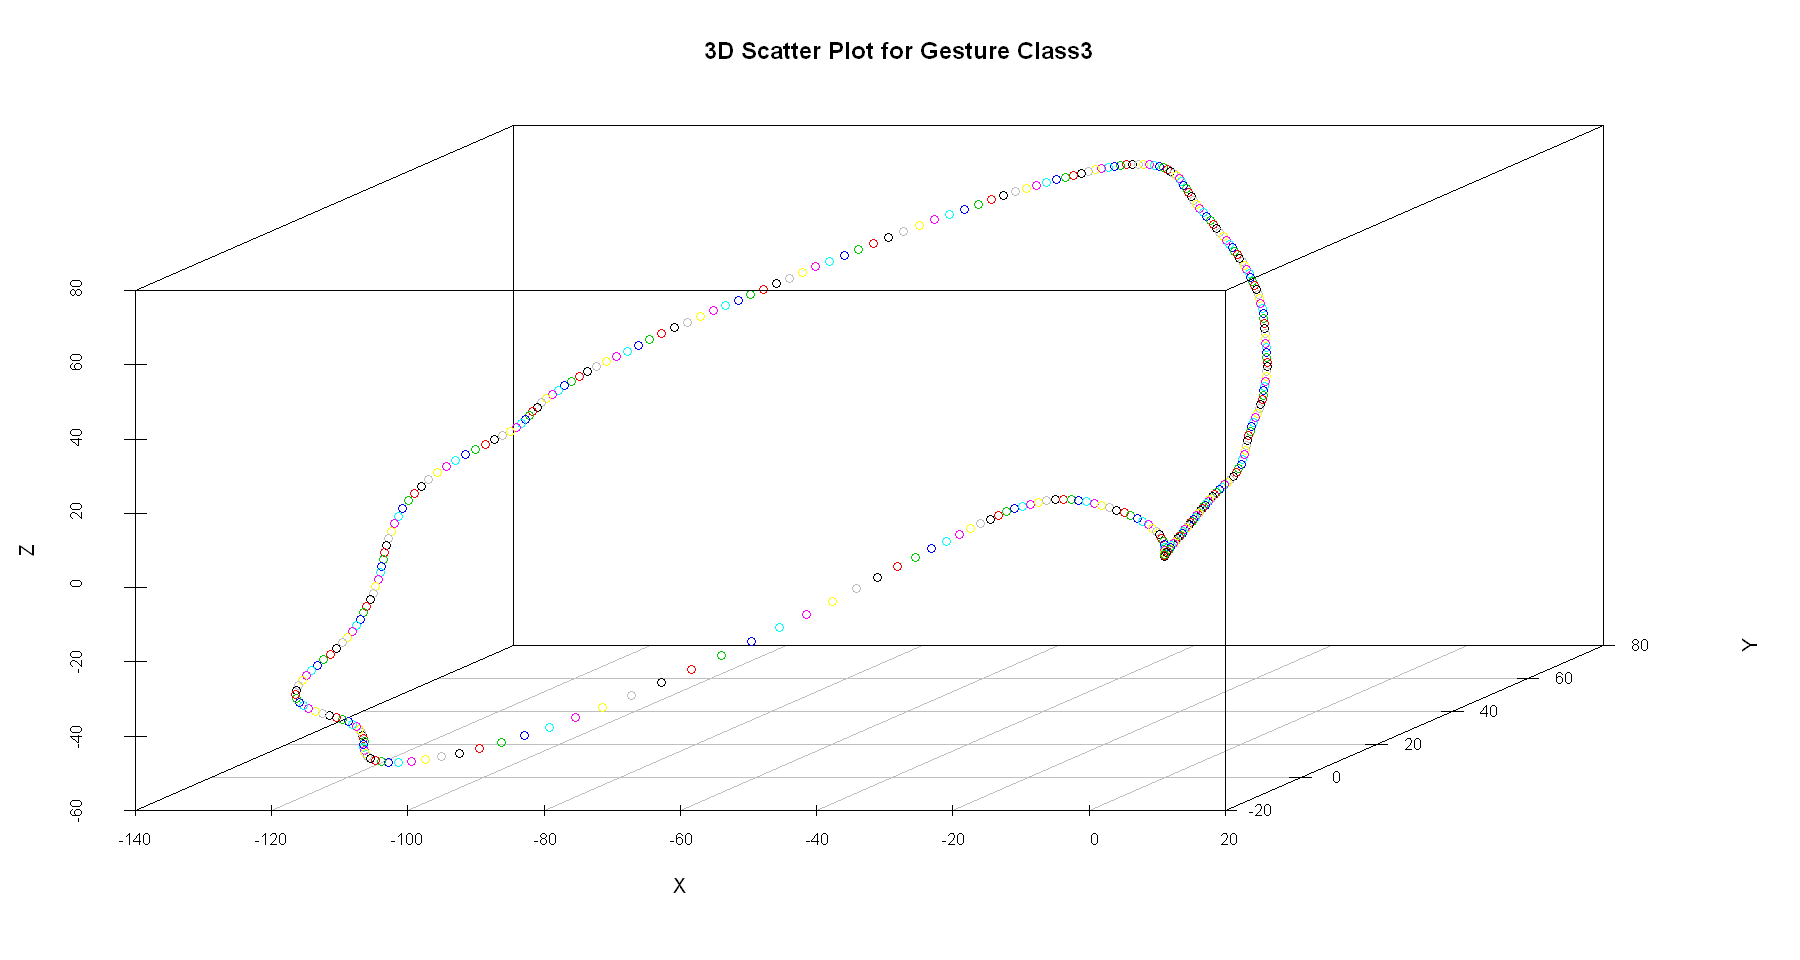

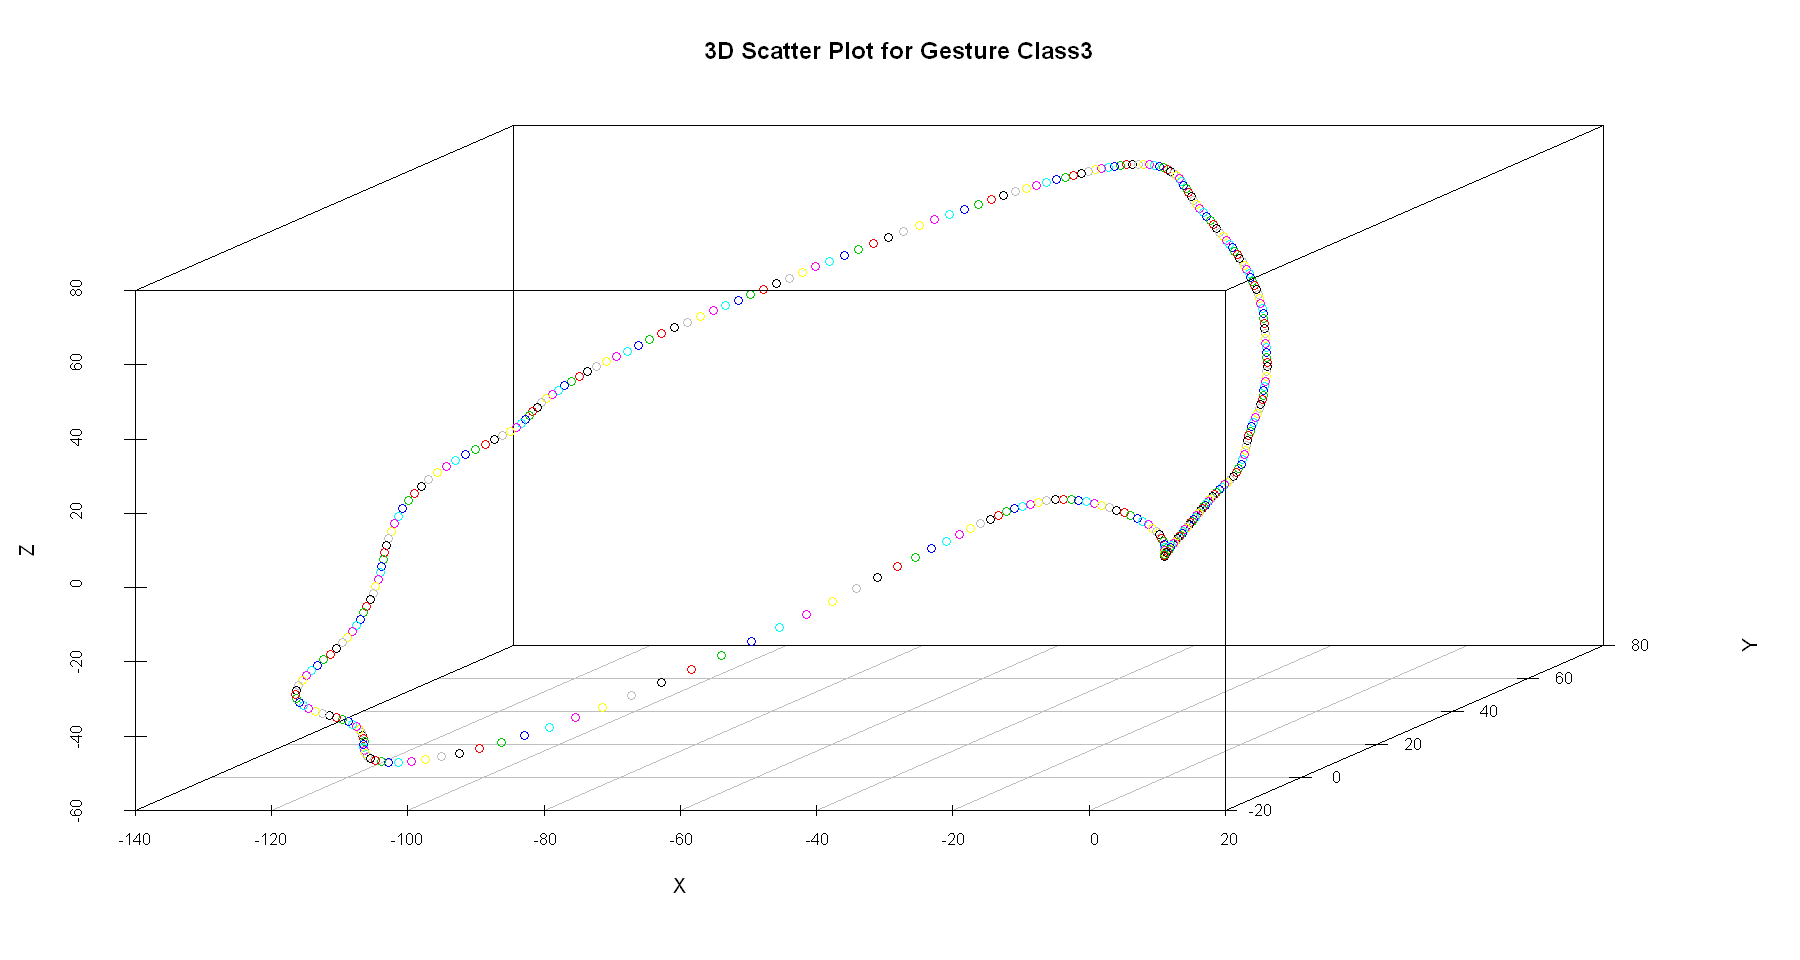

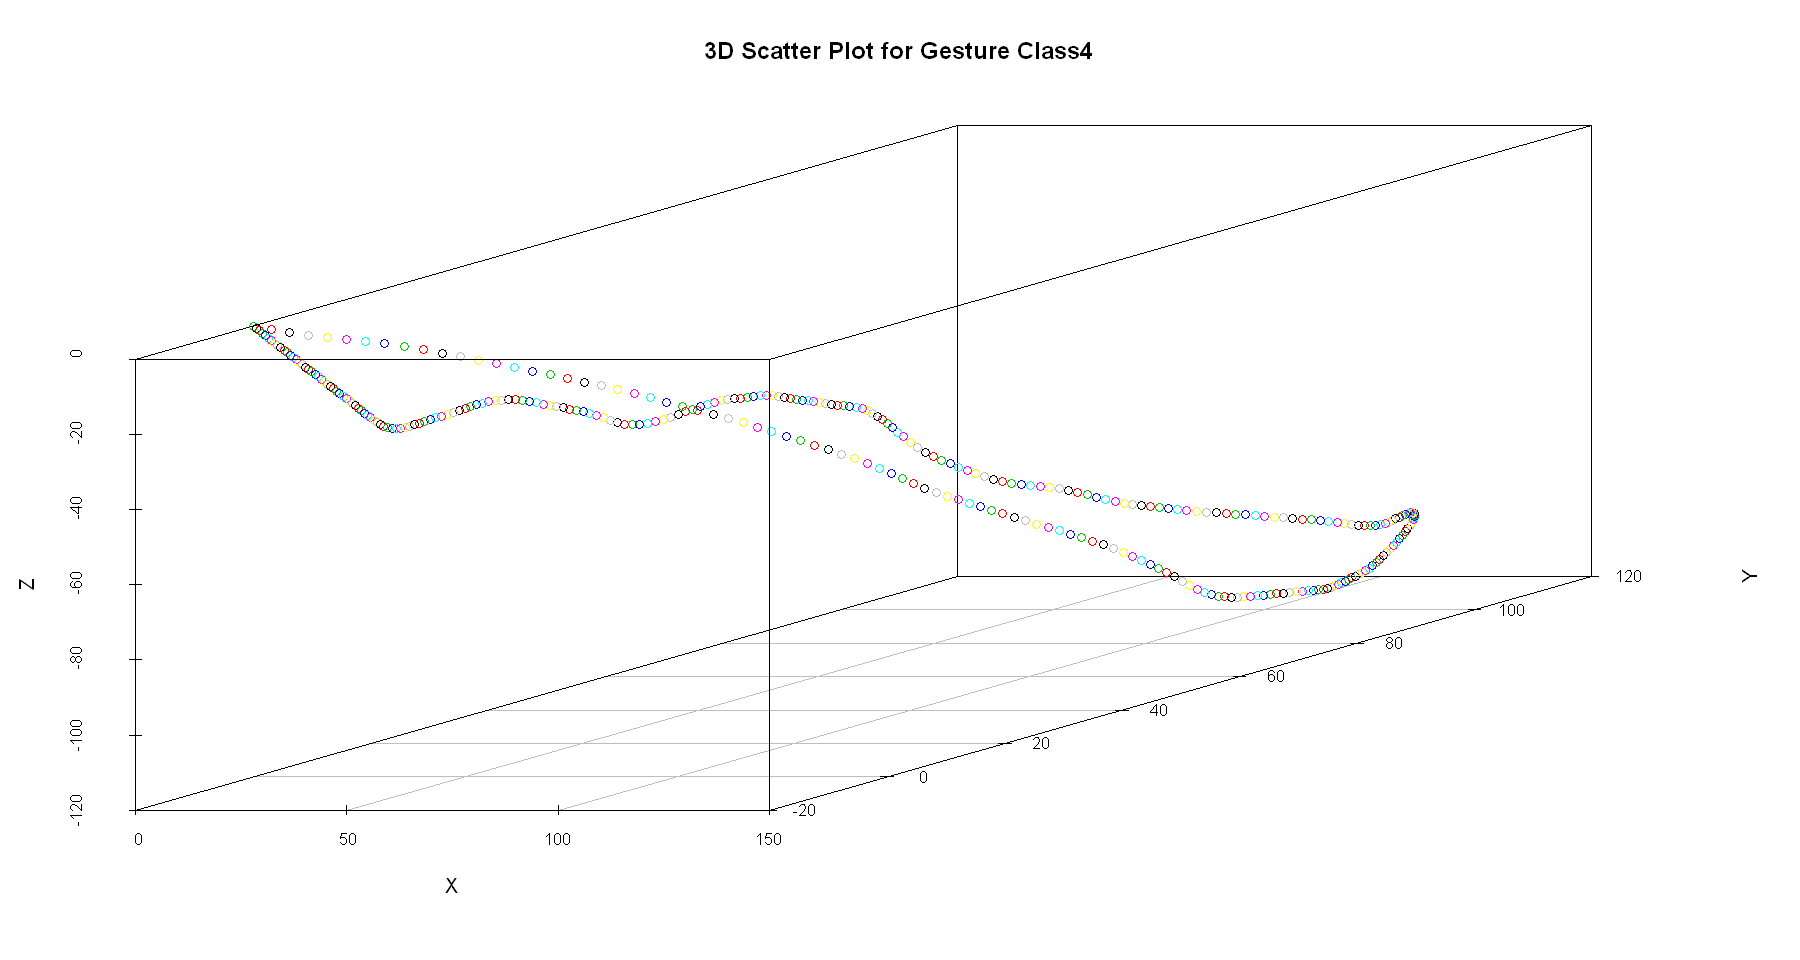

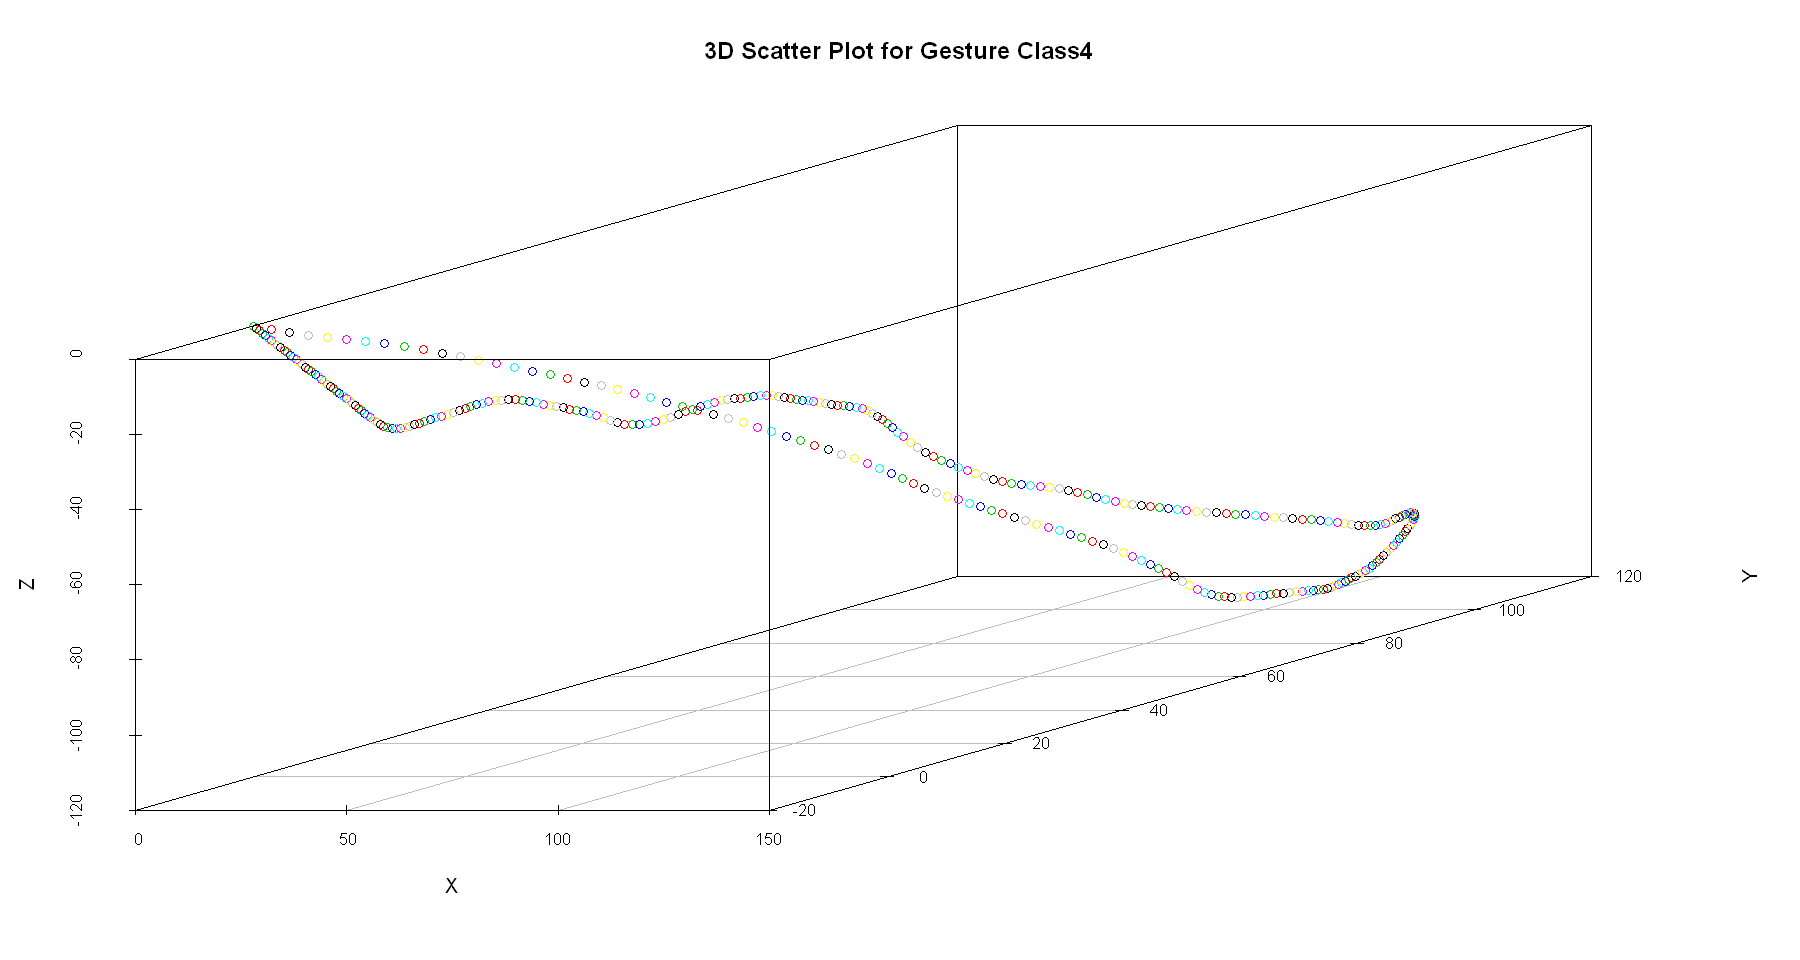

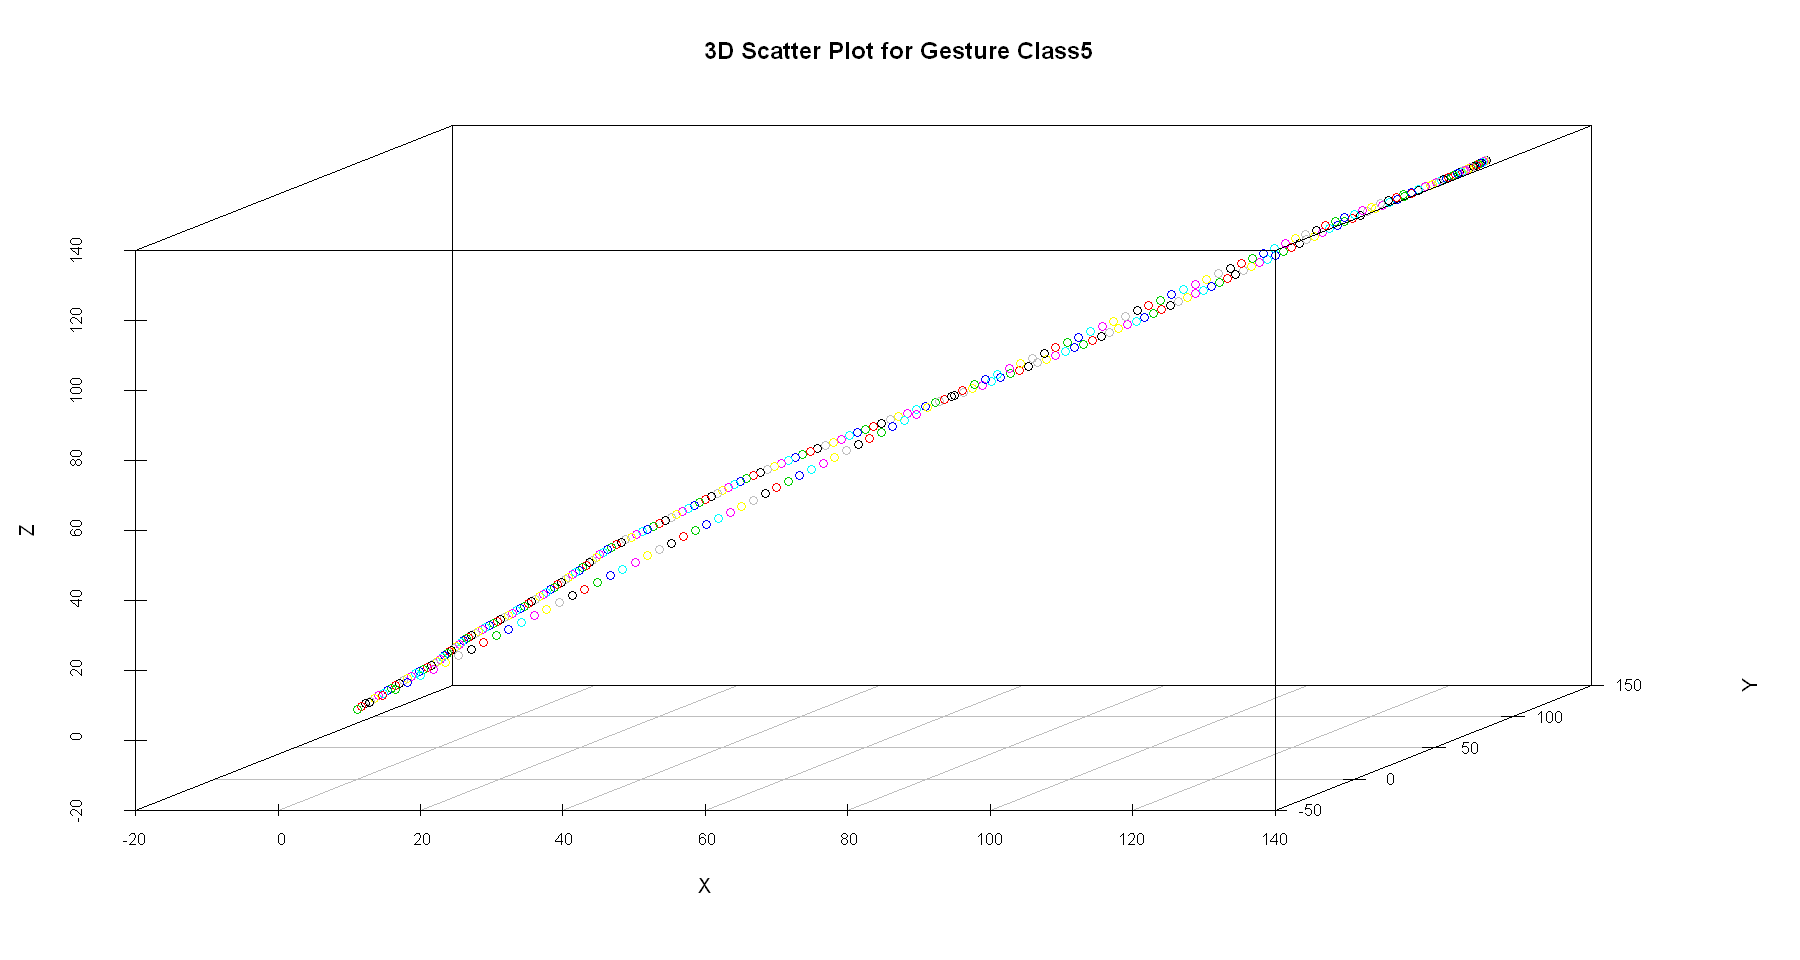

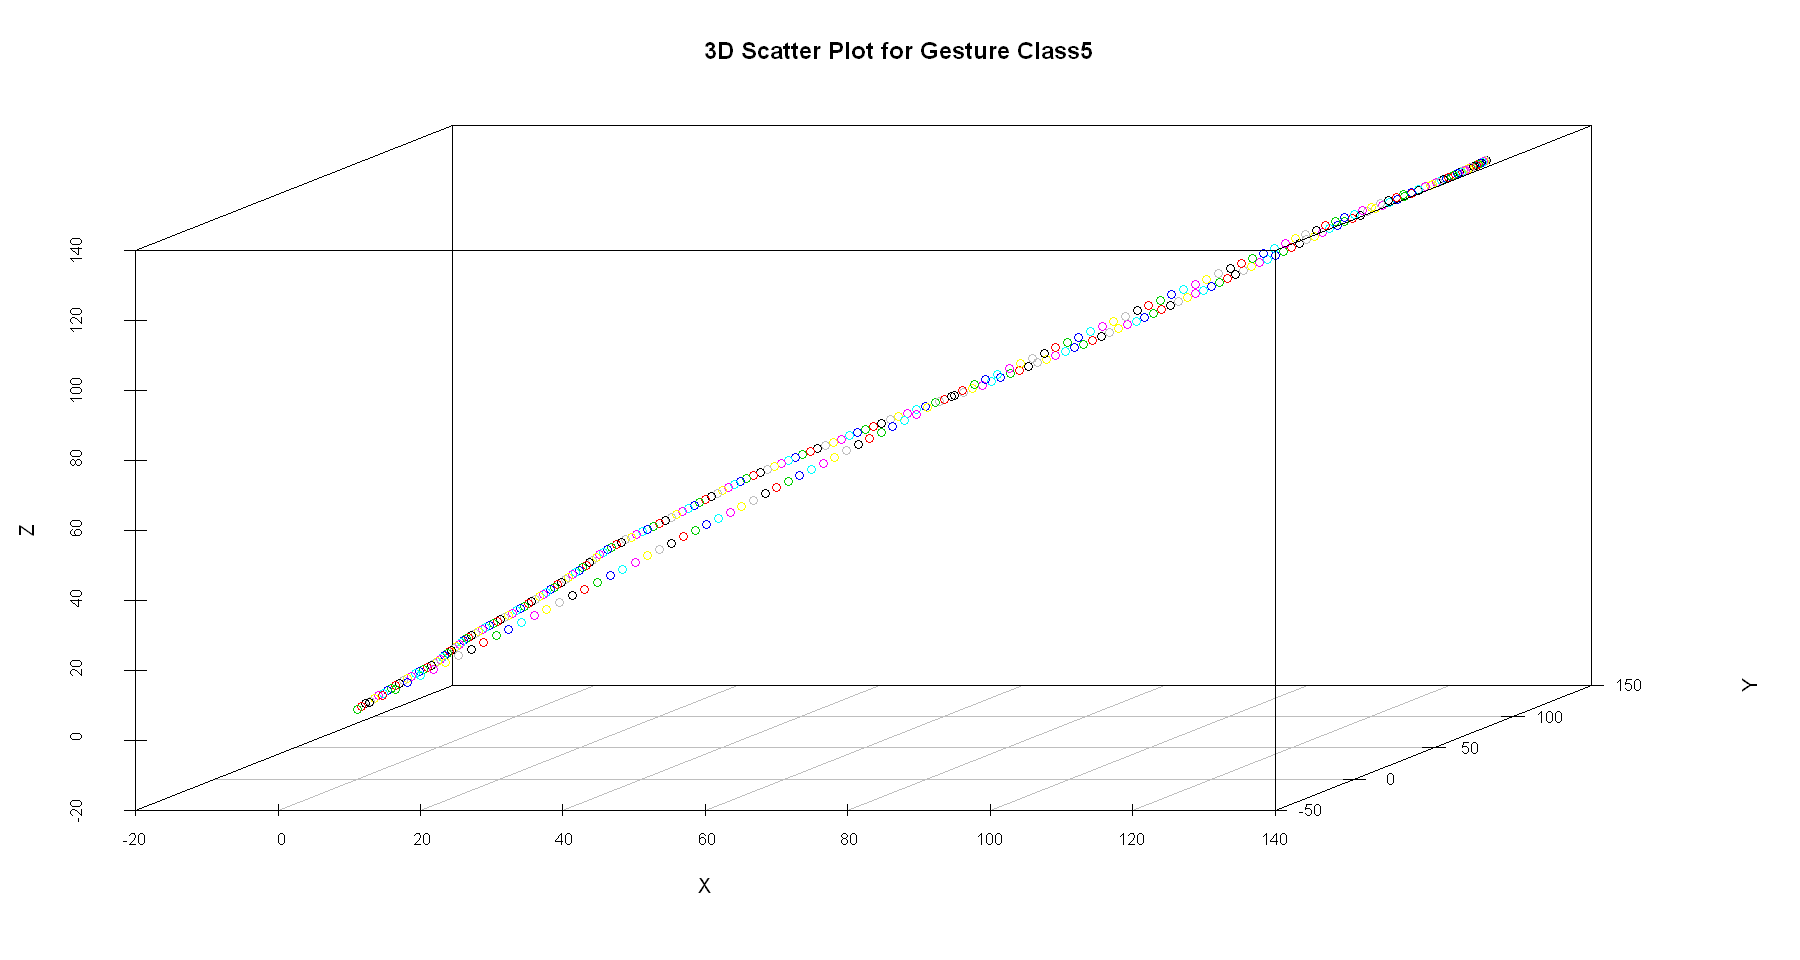

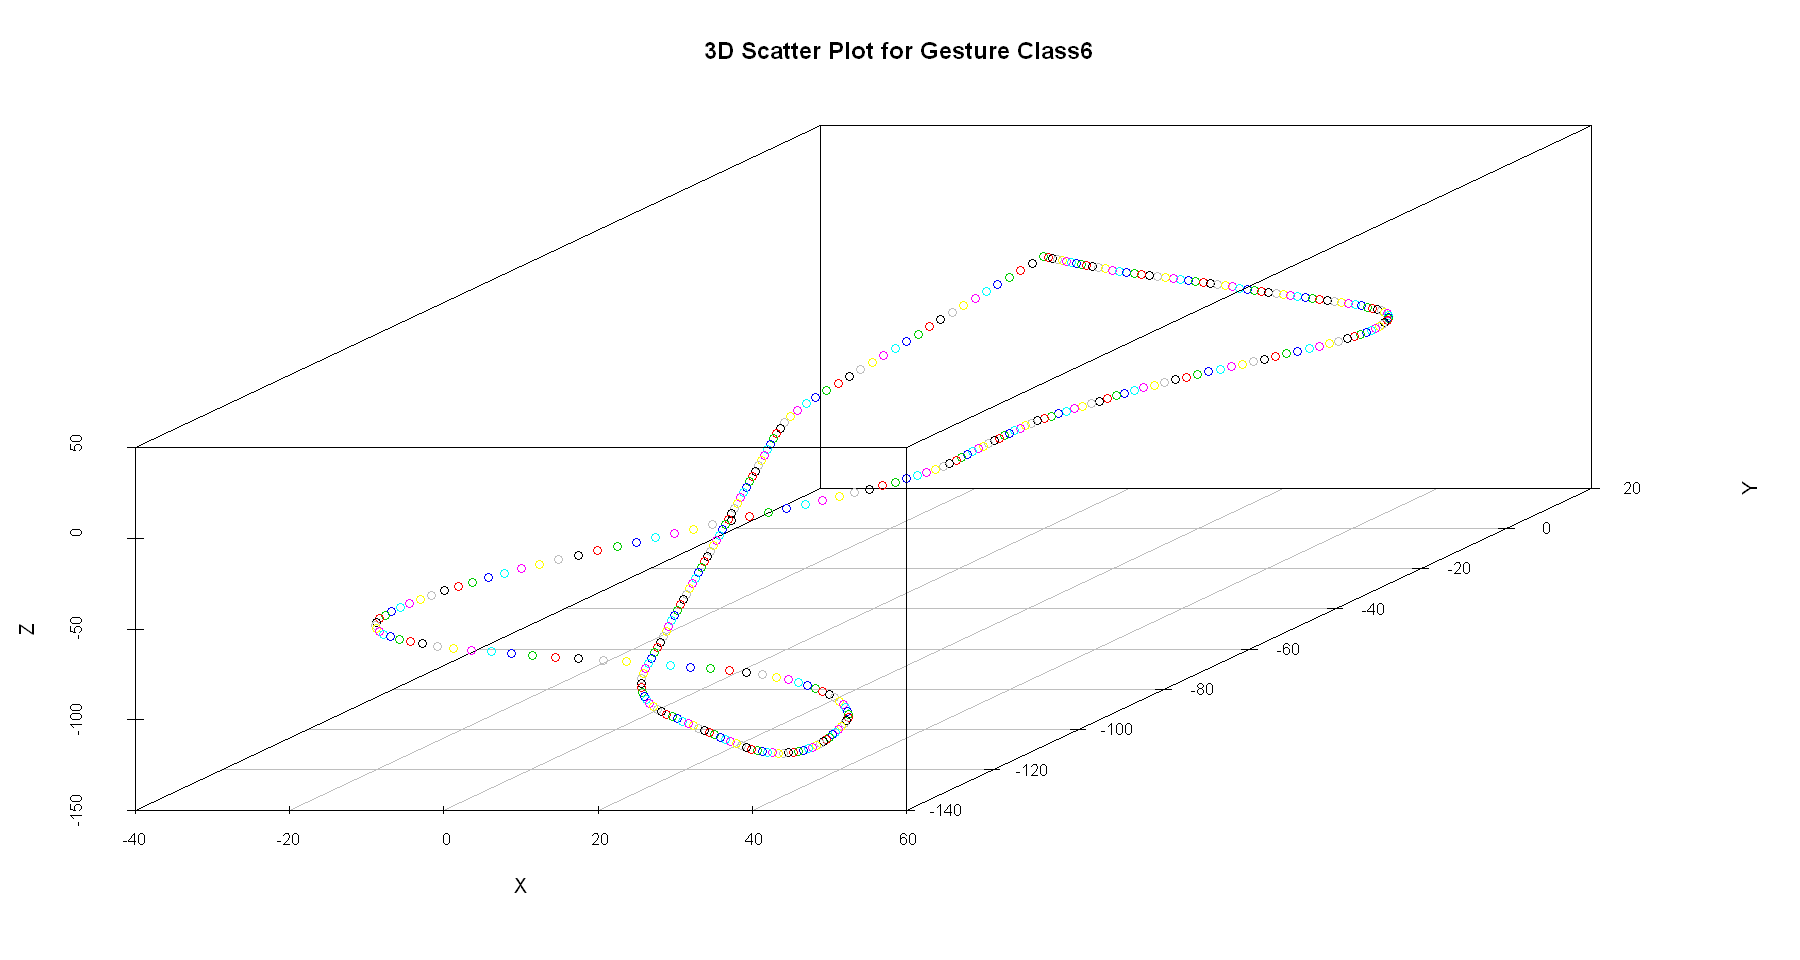

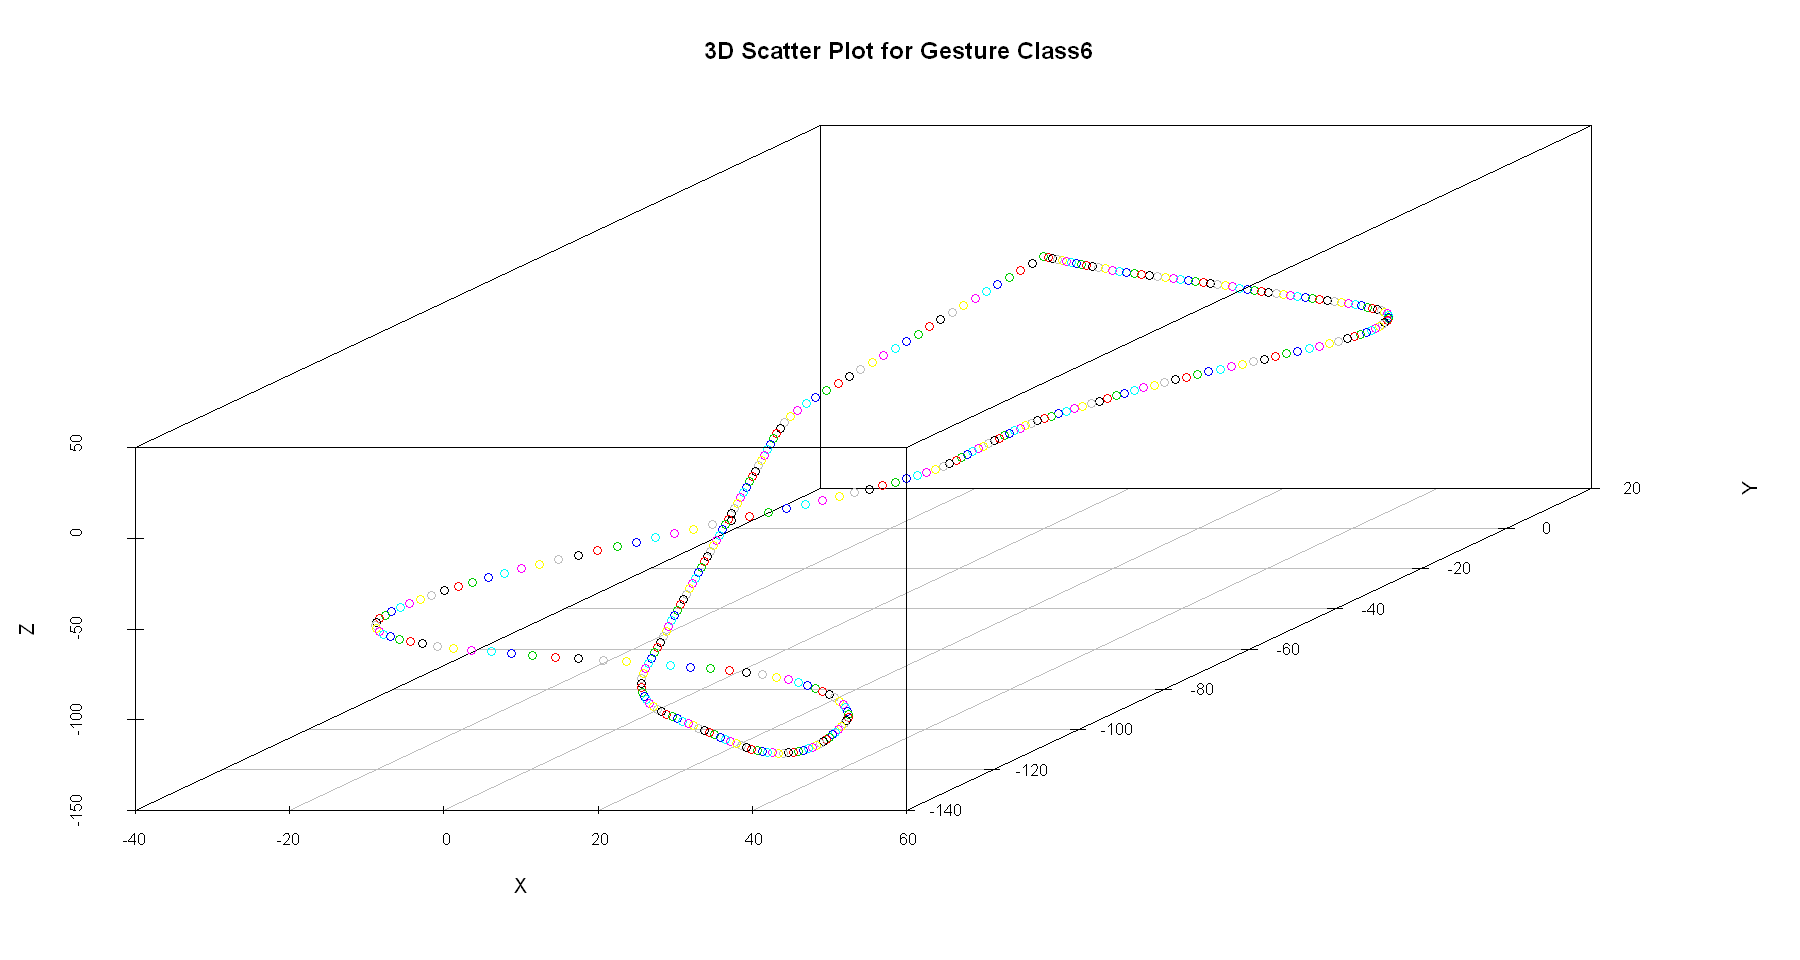

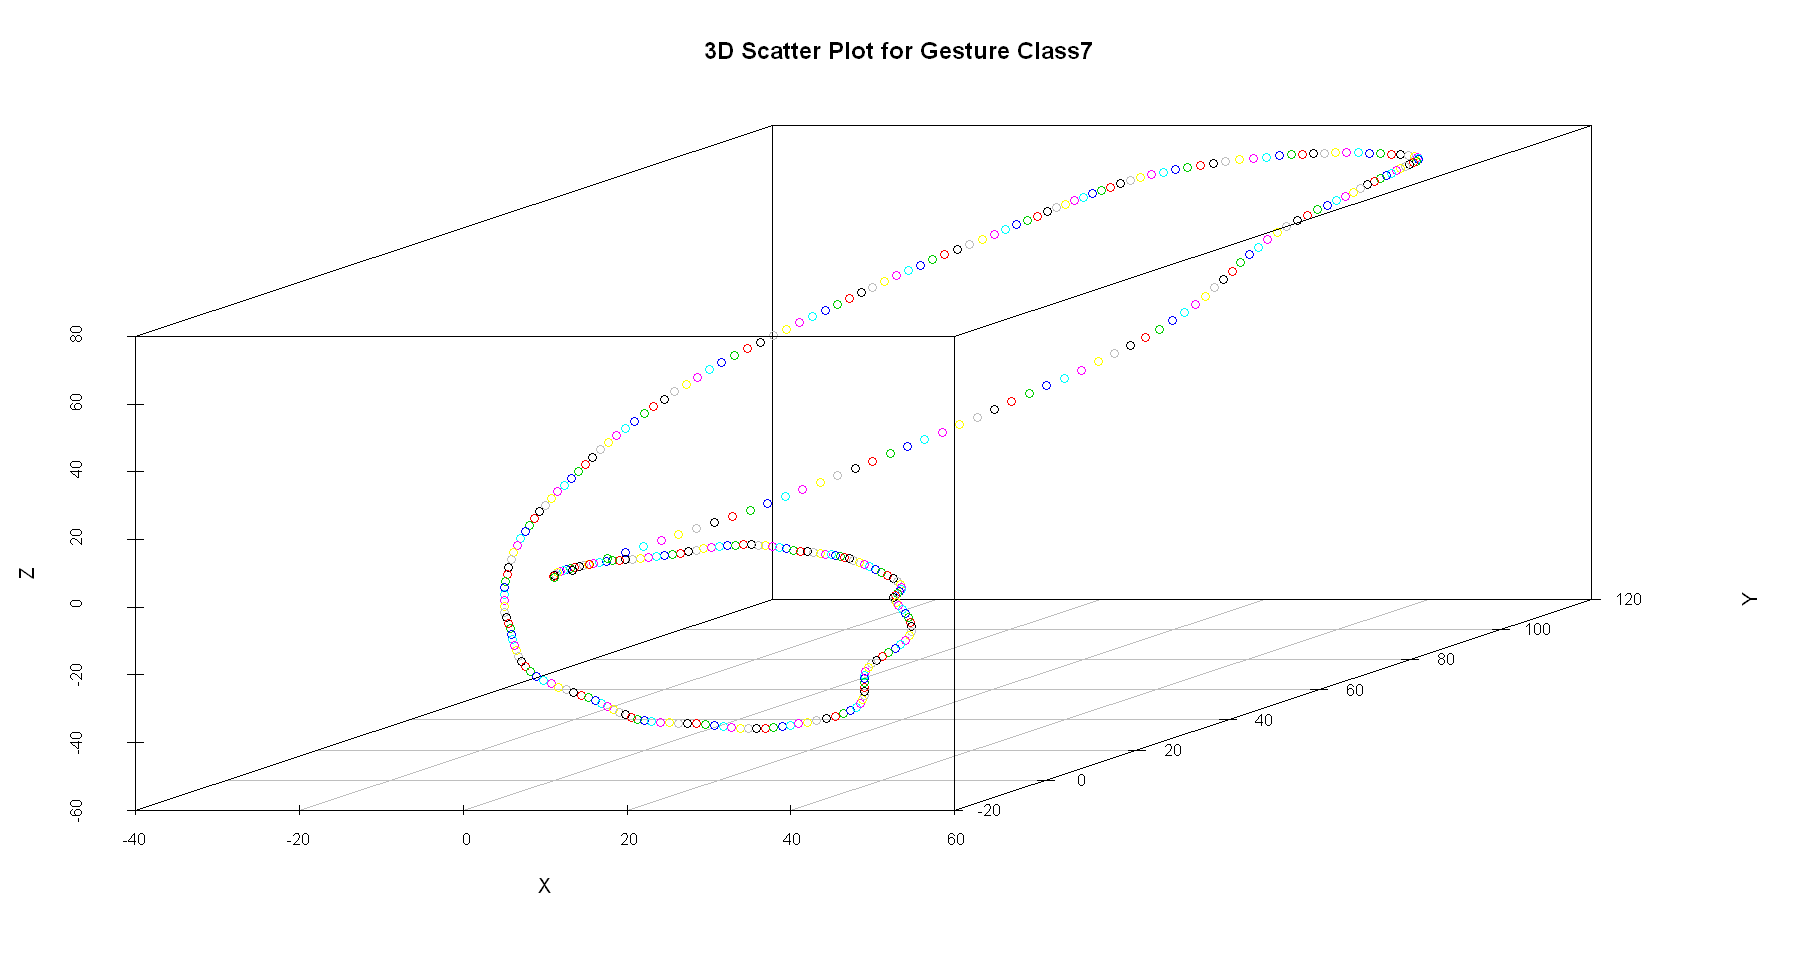

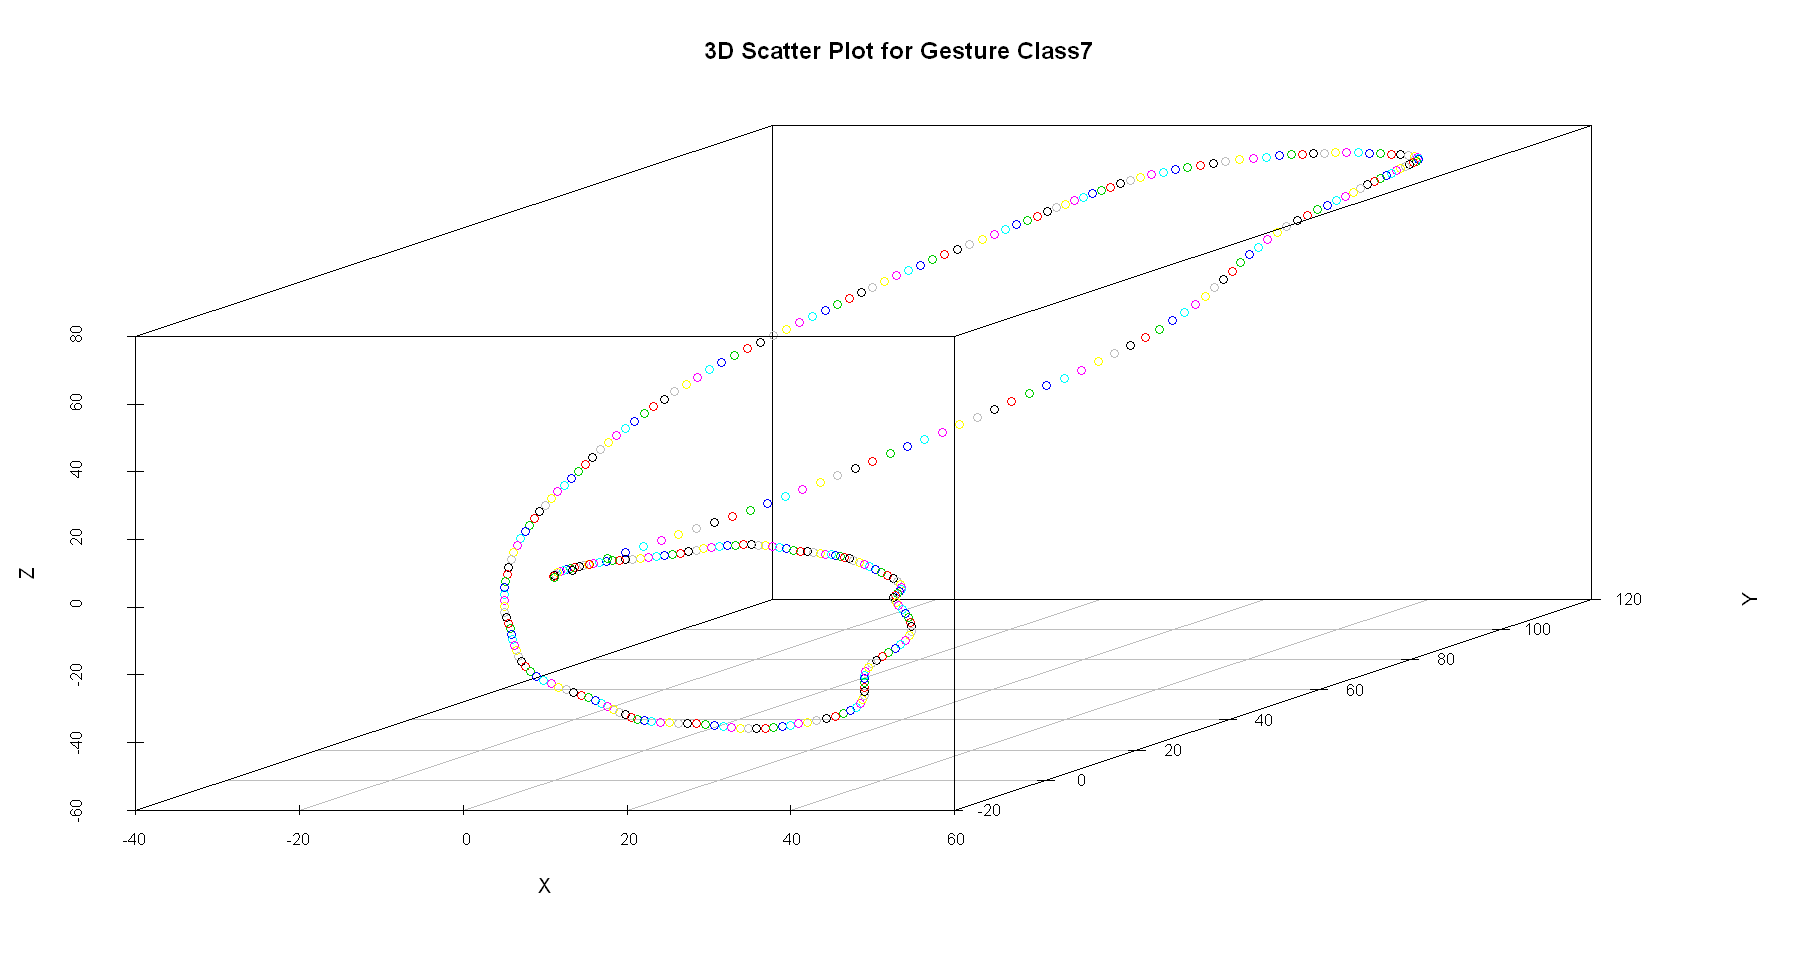

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004cb5cd38>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004cb5cd38>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004cb5cd38>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004cb5cd38>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004cb5cd38>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004cb5cd38>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004cb5cd38>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004cb5cd38>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004d25c5f8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004d25c5f8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004d25c5f8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004d25c5f8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004d25c5f8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004d25c5f8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004d25c5f8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004d25c5f8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004d62d068>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004d62d068>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004d62d068>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004d62d068>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004d62d068>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004d62d068>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004d62d068>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004d62d068>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004398e2a8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004398e2a8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004398e2a8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004398e2a8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004398e2a8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004398e2a8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004398e2a8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004398e2a8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x00000000432fdf18>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x00000000432fdf18>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x00000000432fdf18>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x00000000432fdf18>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x00000000432fdf18>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x00000000432fdf18>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x00000000432fdf18>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x00000000432fdf18>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004d00c6d8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004d00c6d8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004d00c6d8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004d00c6d8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004c7c2db8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004c7c2db8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004c7c2db8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004c7c2db8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004d00c6d8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004d00c6d8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004d00c6d8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004d00c6d8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004c7c2db8>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004c7c2db8>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004c7c2db8>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004c7c2db8>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004cfbef40>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004cfbef40>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004cfbef40>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004cfbef40>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

$xyz.convert
function (x, y = NULL, z = NULL) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y <- (xyz$y - y.add)/y.scal
    return(list(x = xyz$x/x.scal + yx.f * y, y = xyz$z/z.scal + 
        yz.f * y))
}
<bytecode: 0x000000004ccd4fb8>
<environment: 0x000000004cfbef40>

$points3d
function (x, y = NULL, z = NULL, type = "p", ...) 
{
    xyz <- xyz.coords(x, y, z)
    if (angle > 2) {
        temp <- xyz$x
        xyz$x <- xyz$y
        xyz$y <- temp
    }
    y2 <- (xyz$y - y.add)/y.scal
    x <- xyz$x/x.scal + yx.f * y2
    y <- xyz$z/z.scal + yz.f * y2
    mem.par <- par(mar = mar, usr = usr)
    if (type == "h") {
        y2 <- z.min + yz.f * y2
        segments(x, y, x, y2, ...)
        points(x, y, type = "p", ...)
    }
    else points(x, y, type = type, ...)
}
<bytecode: 0x000000004ccc31e8>
<environment: 0x000000004cfbef40>

$plane3d
function (Intercept, x.coef = NULL, y.coef = NULL, lty = "dashed", 
    lty.box = NULL, draw_lines = TRUE, draw_polygon = FALSE, 
    polygon_args = list(border = NA, col = rgb(0, 0, 0, 0.2)), 
    ...) 
{
    if (!is.atomic(Intercept) && !is.null(coef(Intercept))) {
        Intercept <- coef(Intercept)
        if (!("(Intercept)" %in% names(Intercept))) 
            Intercept <- c(0, Intercept)
    }
    if (is.null(lty.box)) 
        lty.box <- lty
    if (is.null(x.coef) && length(Intercept) == 3) {
        x.coef <- Intercept[if (angle > 2) 
            3
        else 2]
        y.coef <- Intercept[if (angle > 2) 
            2
        else 3]
        Intercept <- Intercept[1]
    }
    mem.par <- par(mar = mar, usr = usr)
    x <- x.min:x.max
    y <- 0:y.max
    ltya <- c(lty.box, rep(lty, length(x) - 2), lty.box)
    x.coef <- x.coef * x.scal
    z1 <- (Intercept + x * x.coef + y.add * y.coef)/z.scal
    z2 <- (Intercept + x * x.coef + (y.max * y.scal + y.add) * 
        y.coef)/z.scal
    if (draw_polygon) 
        do.call("polygon", c(list(c(x.min, x.min + y.max * yx.f, 
            x.max + y.max * yx.f, x.max), c(z1[1], z2[1] + yz.f * 
            y.max, z2[length(z2)] + yz.f * y.max, z1[length(z1)])), 
            polygon_args))
    if (draw_lines) 
        segments(x, z1, x + y.max * yx.f, z2 + yz.f * y.max, 
            lty = ltya, ...)
    ltya <- c(lty.box, rep(lty, length(y) - 2), lty.box)
    y.coef <- (y * y.scal + y.add) * y.coef
    z1 <- (Intercept + x.min * x.coef + y.coef)/z.scal
    z2 <- (Intercept + x.max * x.coef + y.coef)/z.scal
    if (draw_lines) 
        segments(x.min + y * yx.f, z1 + y * yz.f, x.max + y * 
            yx.f, z2 + y * yz.f, lty = ltya, ...)
}
<bytecode: 0x000000004cca8a68>
<environment: 0x000000004cfbef40>

$box3d
function (...) 
{
    mem.par <- par(mar = mar, usr = usr)
    lines(c(x.min, x.max), c(z.max, z.max), ...)
    lines(c(0, y.max * yx.f) + x.max, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(0, y.max * yx.f) + x.min, c(0, y.max * yz.f) + z.max, 
        ...)
    lines(c(x.max, x.max), c(z.min, z.max), ...)
    lines(c(x.min, x.min), c(z.min, z.max), ...)
    lines(c(x.min, x.max), c(z.min, z.min), ...)
}
<bytecode: 0x000000004cc859b8>
<environment: 0x000000004cfbef40>

$contour3d
function (f, x.count = 10, y.count = 10, type = "l", lty = "24", 
    x.resolution = 50, y.resolution = 50, ...) 
{
    if (class(f) == "lm") {
        vars <- all.vars(formula(f))
    }
    else vars <- c("z", "x", "y")
    for (x1 in seq(x.range.fix[1], x.range.fix[2], length = x.count)) {
        d <- data.frame(x1, seq(y.range.fix[1], y.range.fix[2], 
            length = y.resolution))
        names(d) <- vars[-1]
        if (class(f) == "lm") {
            d[vars[1]] <- predict(f, newdata = d)
        }
        else d[vars[1]] <- f(d[[1]], d[[2]])
        xyz <- xyz.coords(d)
        if (angle > 2) {
            temp <- xyz$x
            xyz$x <- xyz$y
            xyz$y <- temp
        }
        y2 <- (xyz$y - y.add)/y.scal
        x <- xyz$x/x.scal + yx.f * 

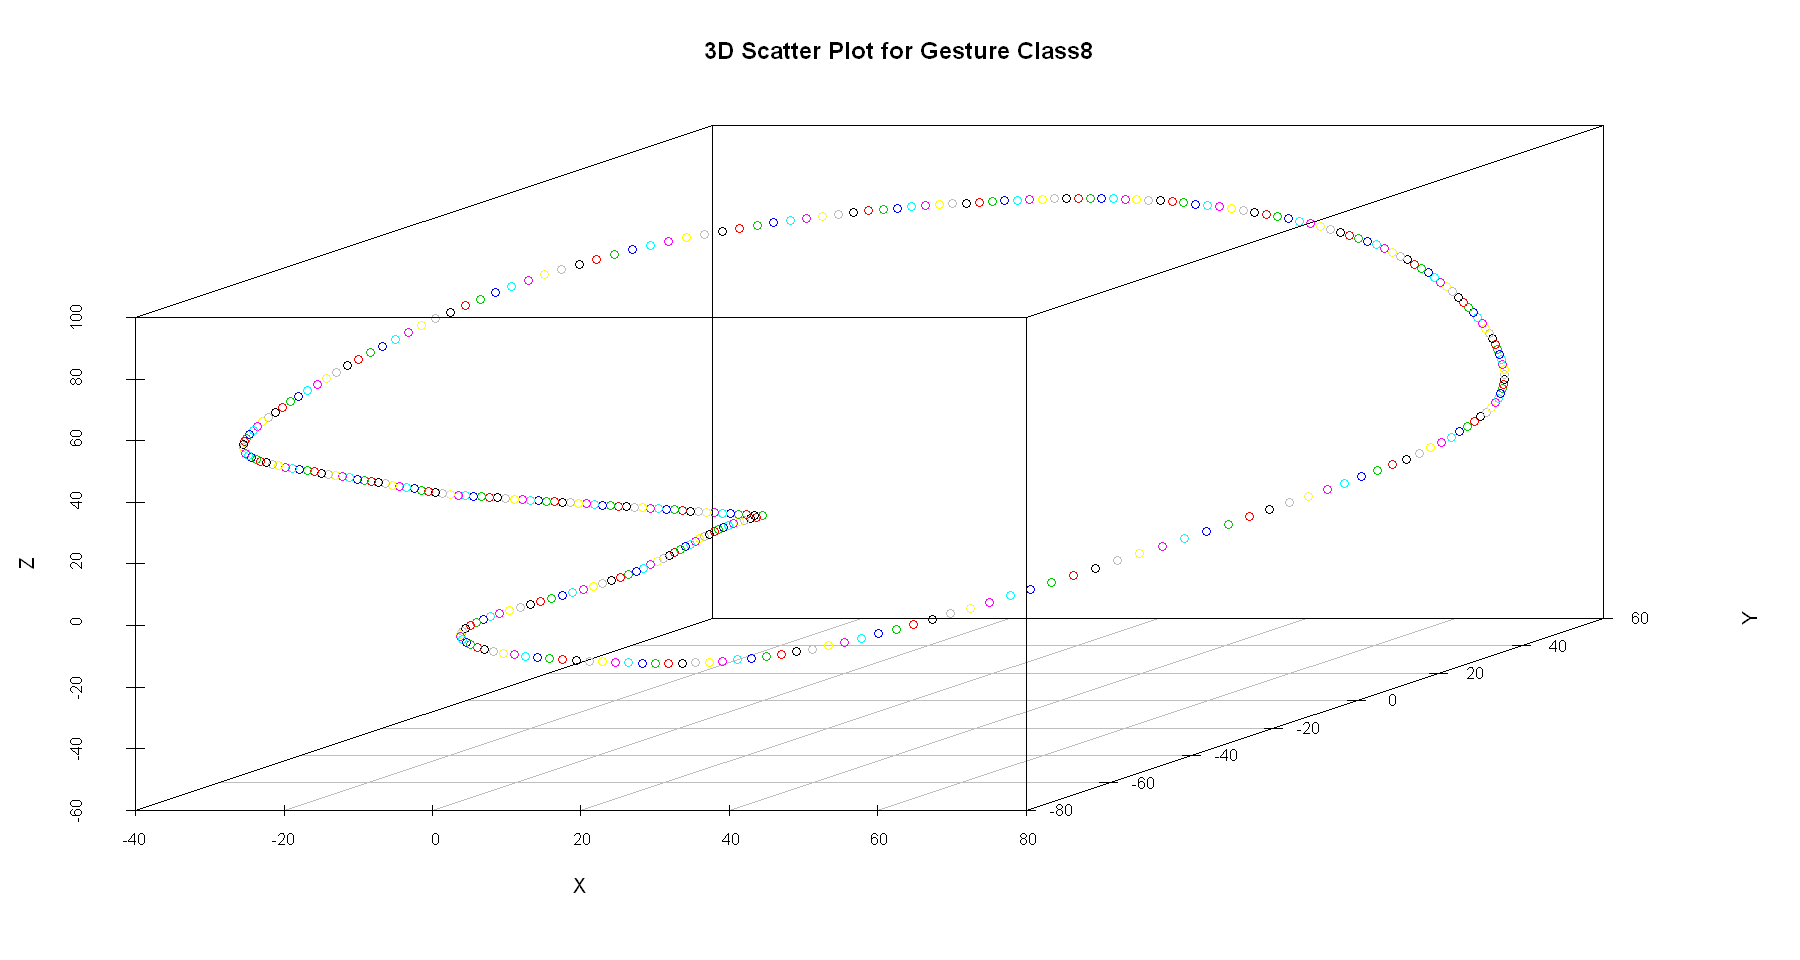

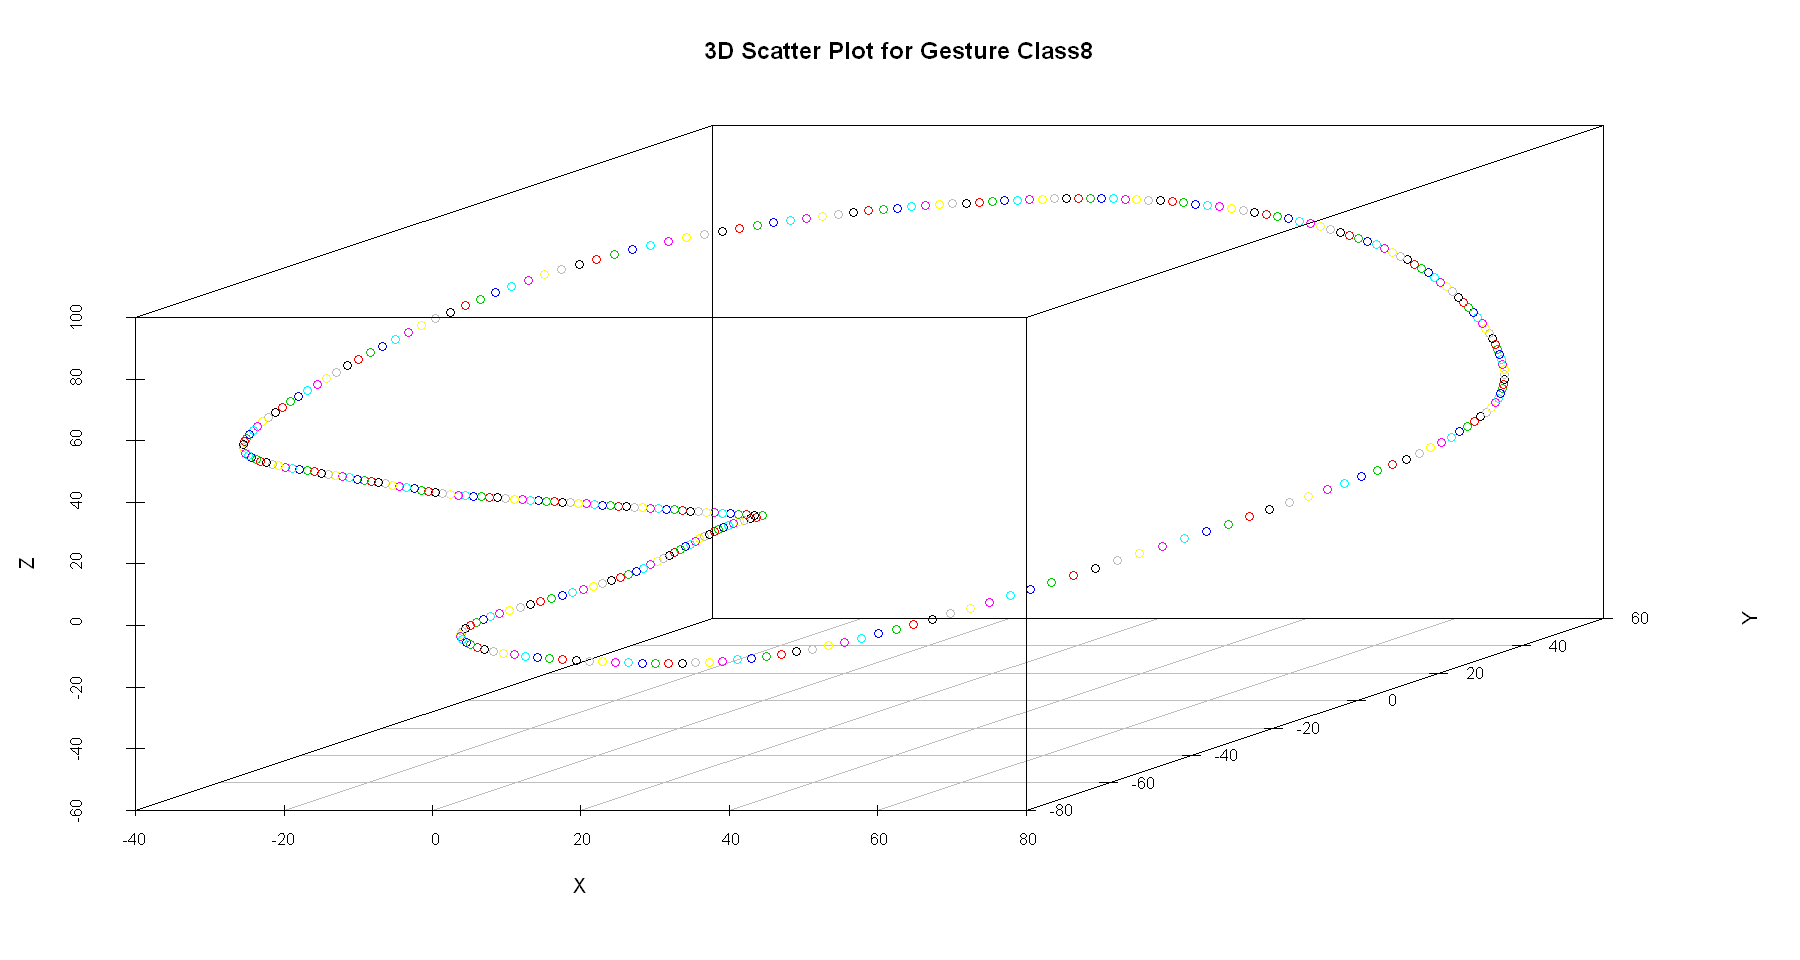

In [12]:
class_1_velo_plot_s <- scatterplot3d( x=class_1_1$x_velocity, y=class_1_1$y_velocity, z=class_1_1$z_velocity, main="3D Scatter Plot for Gesture Class1", xlab = "X", ylab= "Y", zlab="Z",color = class_1_1$time)
class_2_velo_plot_s <- scatterplot3d( x=class_2_1$x_velocity, y=class_2_1$y_velocity, z=class_2_1$z_velocity, main="3D Scatter Plot for Gesture Class2", xlab = "X", ylab= "Y", zlab="Z",color = class_2_1$time)
class_3_velo_plot_s <- scatterplot3d( x=class_3_1$x_velocity, y=class_3_1$y_velocity, z=class_3_1$z_velocity, main="3D Scatter Plot for Gesture Class3", xlab = "X", ylab= "Y", zlab="Z",color = class_3_1$time)
class_4_velo_plot_s <- scatterplot3d( x=class_4_1$x_velocity, y=class_4_1$y_velocity, z=class_4_1$z_velocity, main="3D Scatter Plot for Gesture Class4", xlab = "X", ylab= "Y", zlab="Z",color = class_4_1$time)
class_5_velo_plot_s <- scatterplot3d( x=class_5_1$x_velocity, y=class_5_1$y_velocity, z=class_5_1$z_velocity, main="3D Scatter Plot for Gesture Class5", xlab = "X", ylab= "Y", zlab="Z",color = class_5_1$time)
class_6_velo_plot_s <- scatterplot3d( x=class_6_1$x_velocity, y=class_6_1$y_velocity, z=class_6_1$z_velocity, main="3D Scatter Plot for Gesture Class6", xlab = "X", ylab= "Y", zlab="Z",color = class_6_1$time)
class_7_velo_plot_s <- scatterplot3d( x=class_7_1$x_velocity, y=class_7_1$y_velocity, z=class_7_1$z_velocity, main="3D Scatter Plot for Gesture Class7", xlab = "X", ylab= "Y", zlab="Z",color = class_7_1$time)
class_8_velo_plot_s <- scatterplot3d( x=class_8_1$x_velocity, y=class_8_1$y_velocity, z=class_8_1$z_velocity, main="3D Scatter Plot for Gesture Class8", xlab = "X", ylab= "Y", zlab="Z",color = class_8_1$time)

class_1_velo_plot_s 
class_2_velo_plot_s 
class_3_velo_plot_s 
class_4_velo_plot_s 
class_5_velo_plot_s
class_6_velo_plot_s
class_7_velo_plot_s 
class_8_velo_plot_s

### First approach: Naive Attempt

To approach the data in a bit more detailed way I have tried to use a heat map for the values in the x axis.

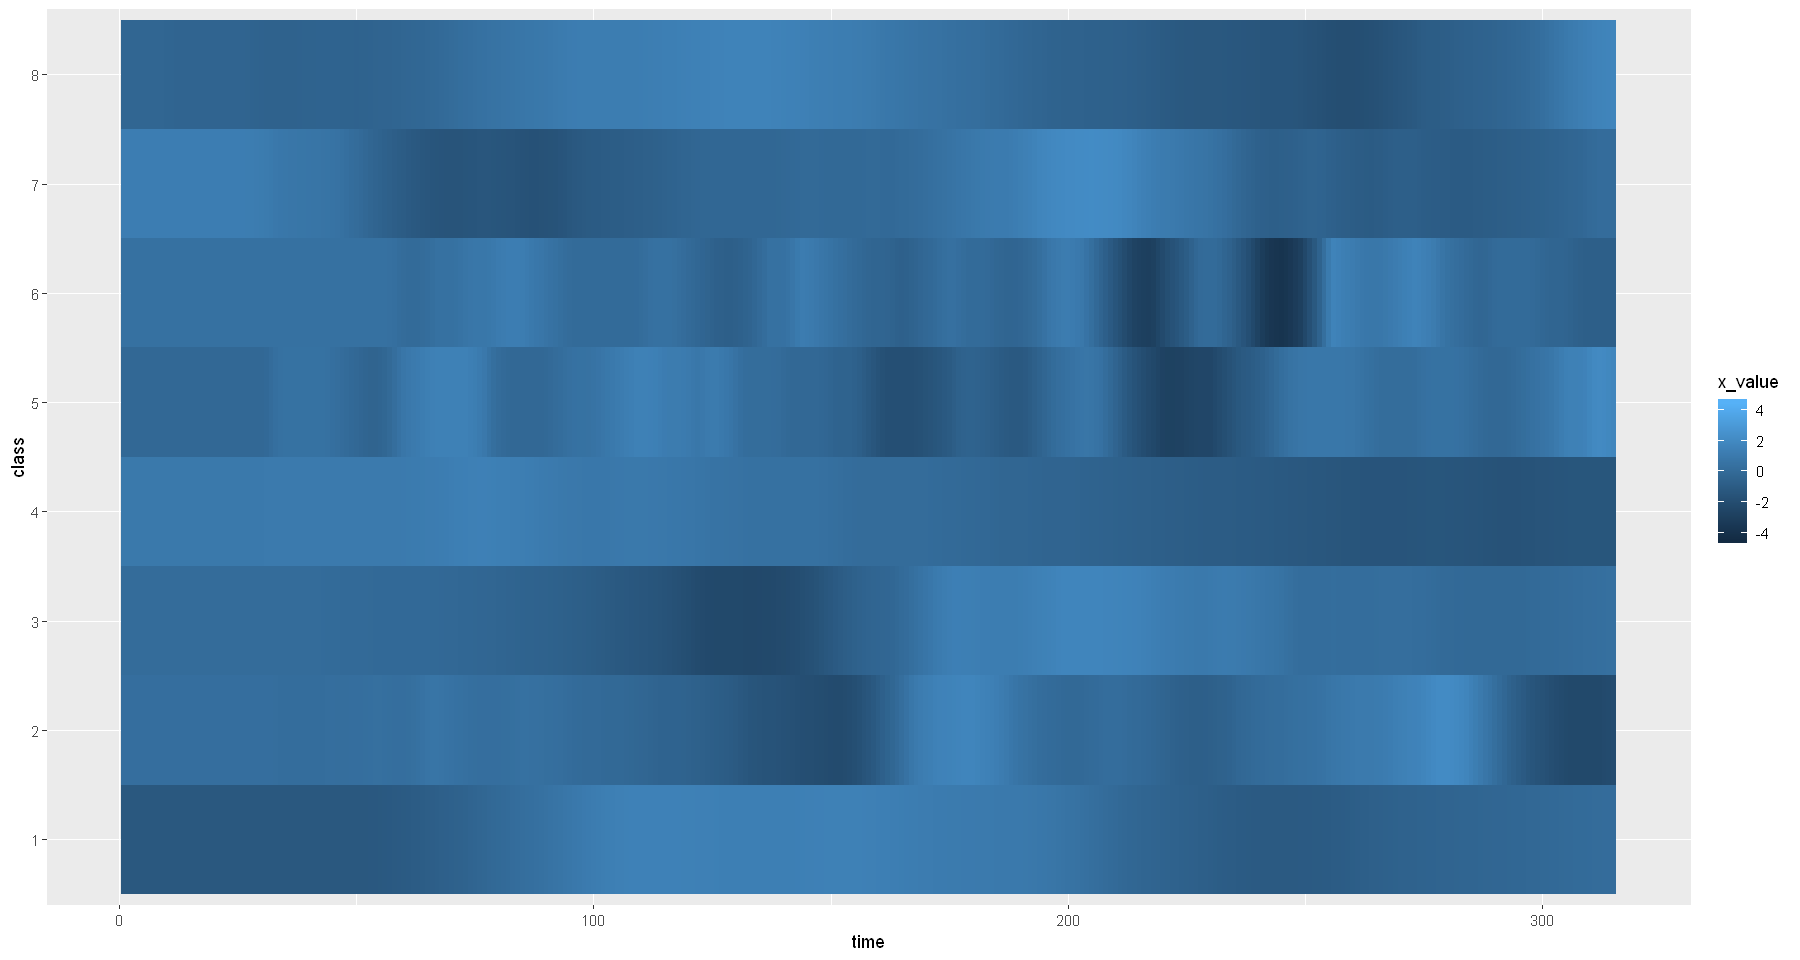

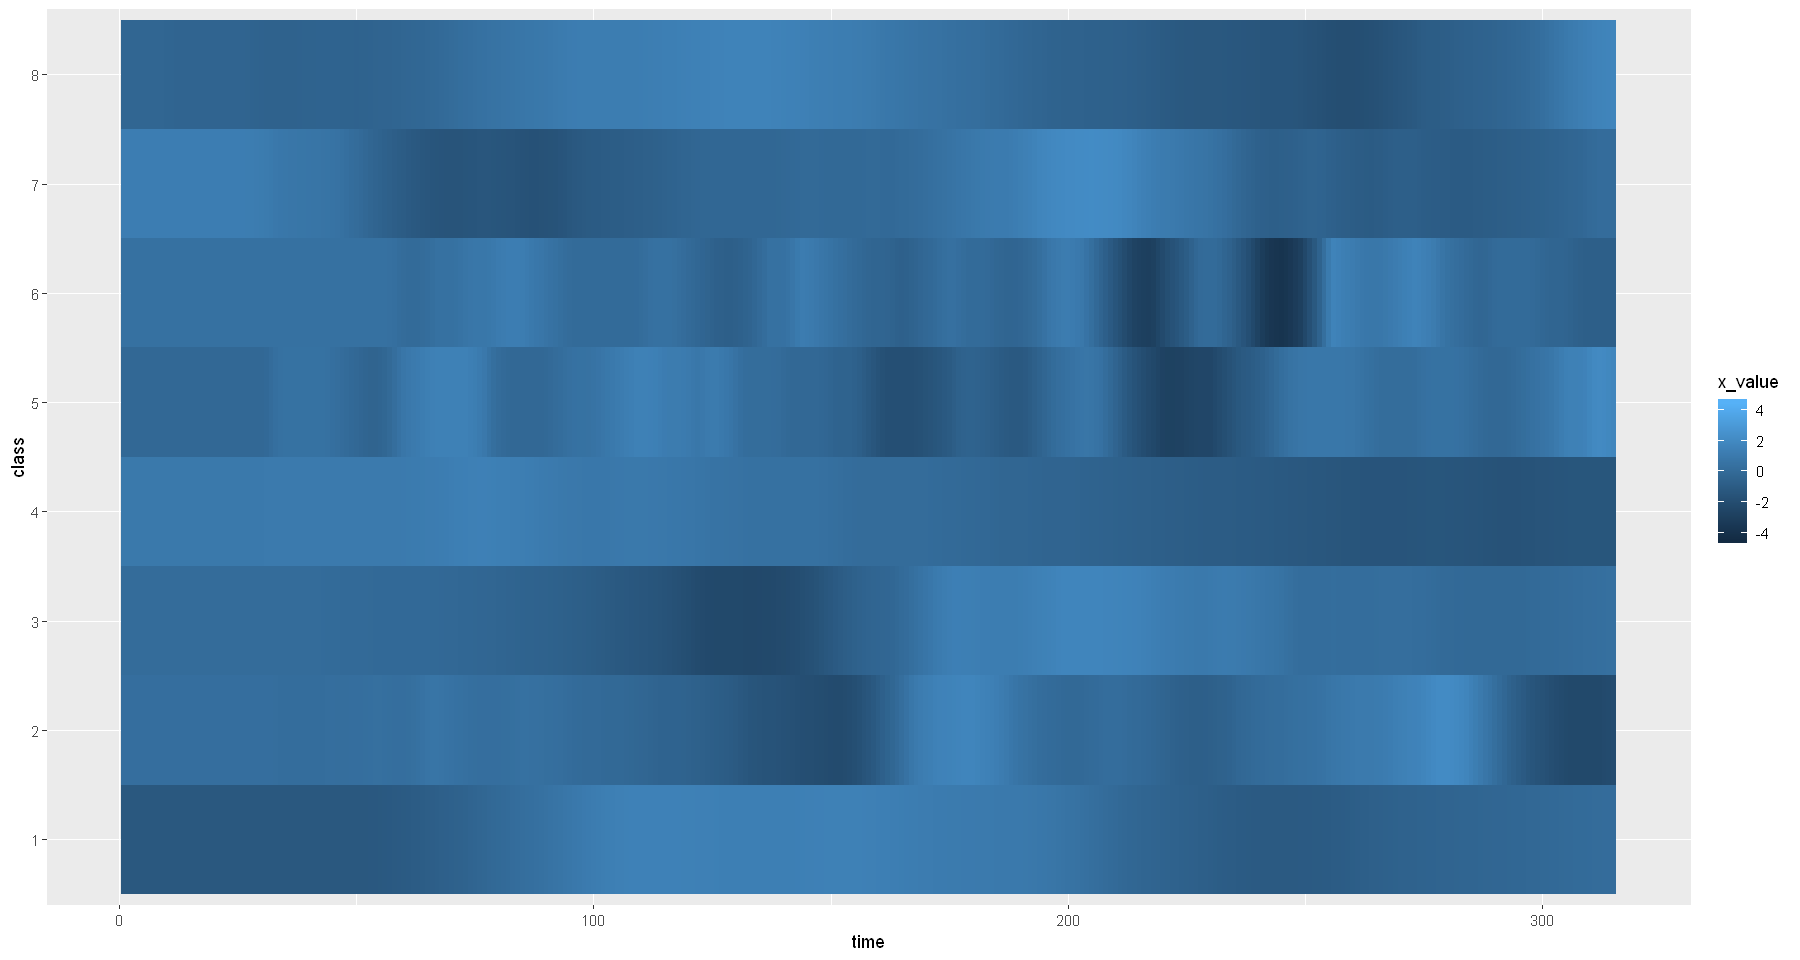

In [14]:
long_train=long_train[order(class,id,time)]
ggplot(long_train, aes(time,class, fill= x_value)) + 
  geom_tile()



And then tried to check if those x values are really differently distributed in each class, the result was not satisfactory.

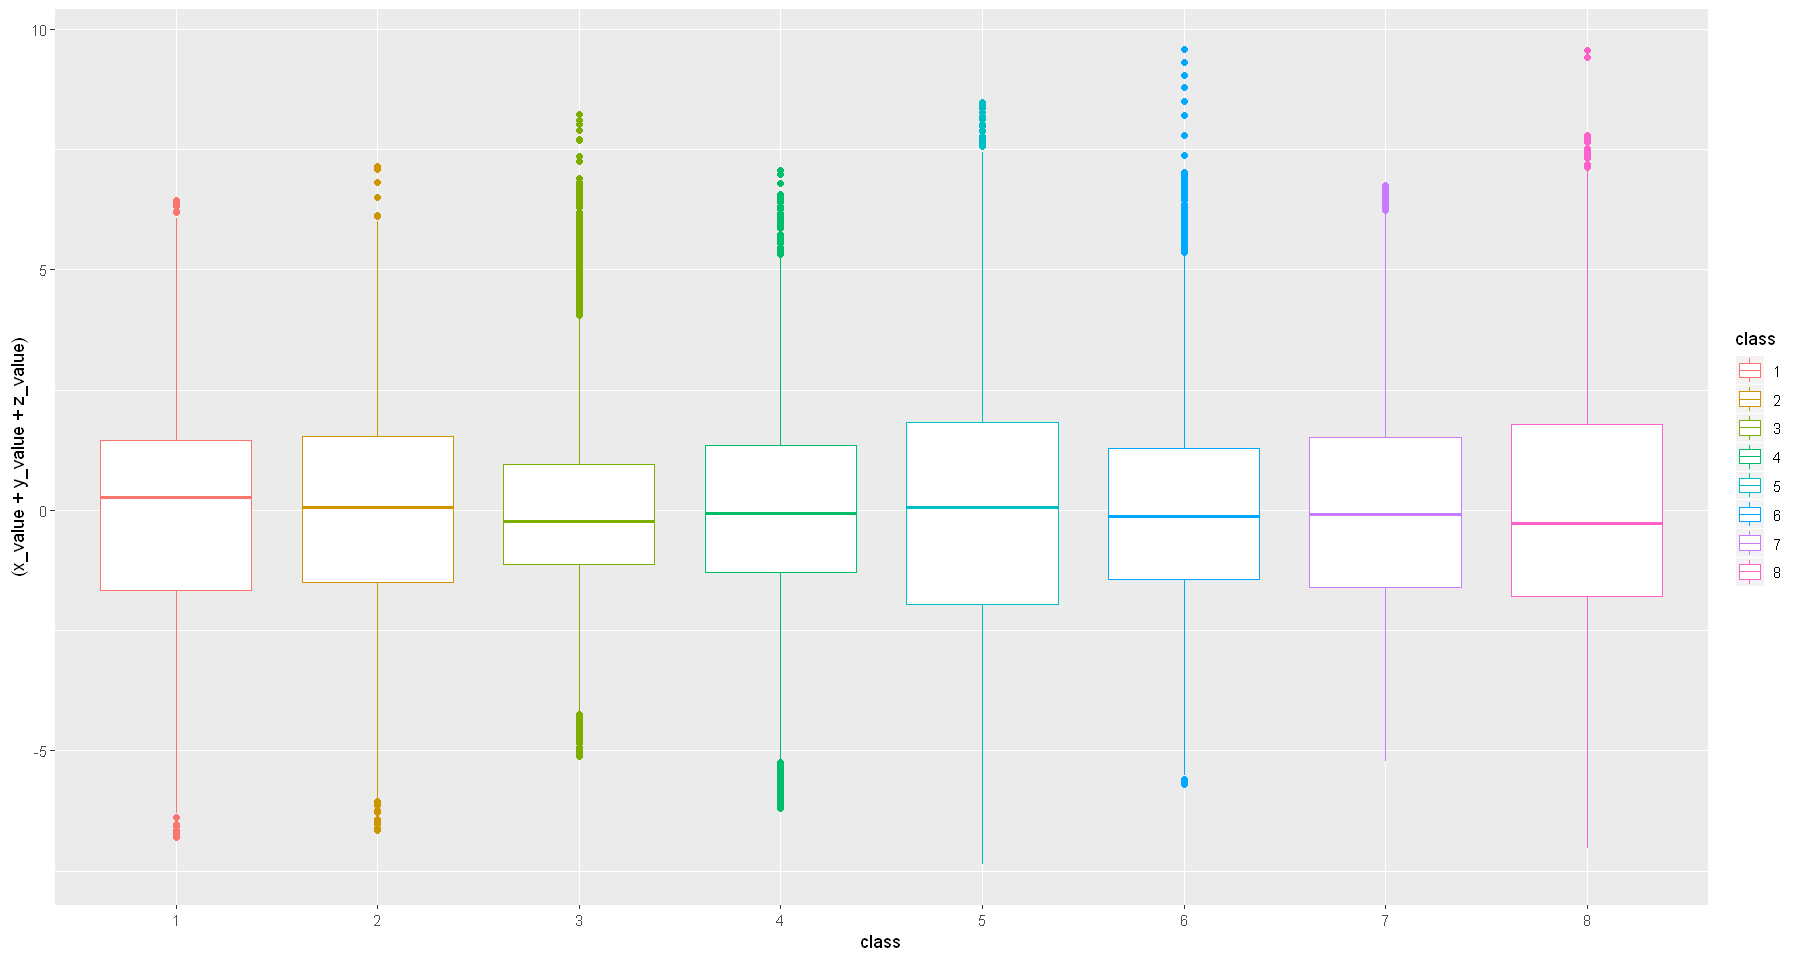

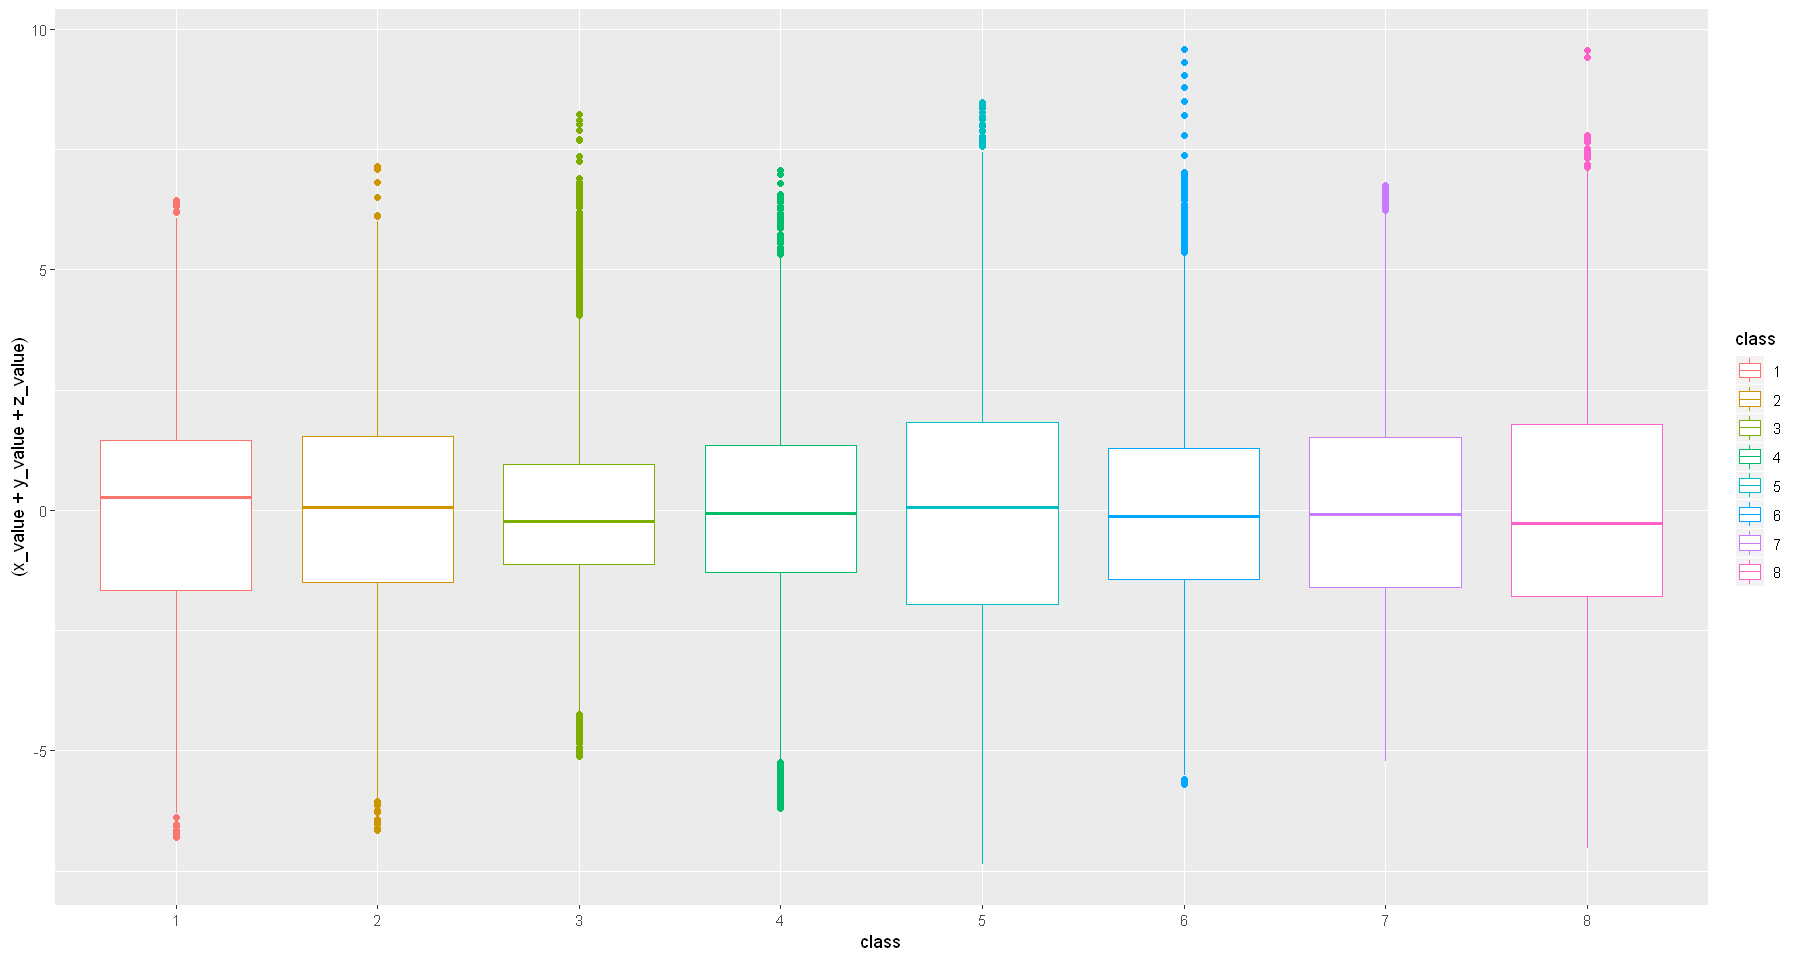

In [15]:
ggplot(long_train, aes(x=class, y=(x_value+y_value+z_value), color=class)) +
  geom_boxplot()

I tried to check the velocity values this time not the acceleration data to check if they can be used to differentiate the classes. They were indeed different. However there are many many outliers so it is not relevant to draw a conclusion with thisinformation.

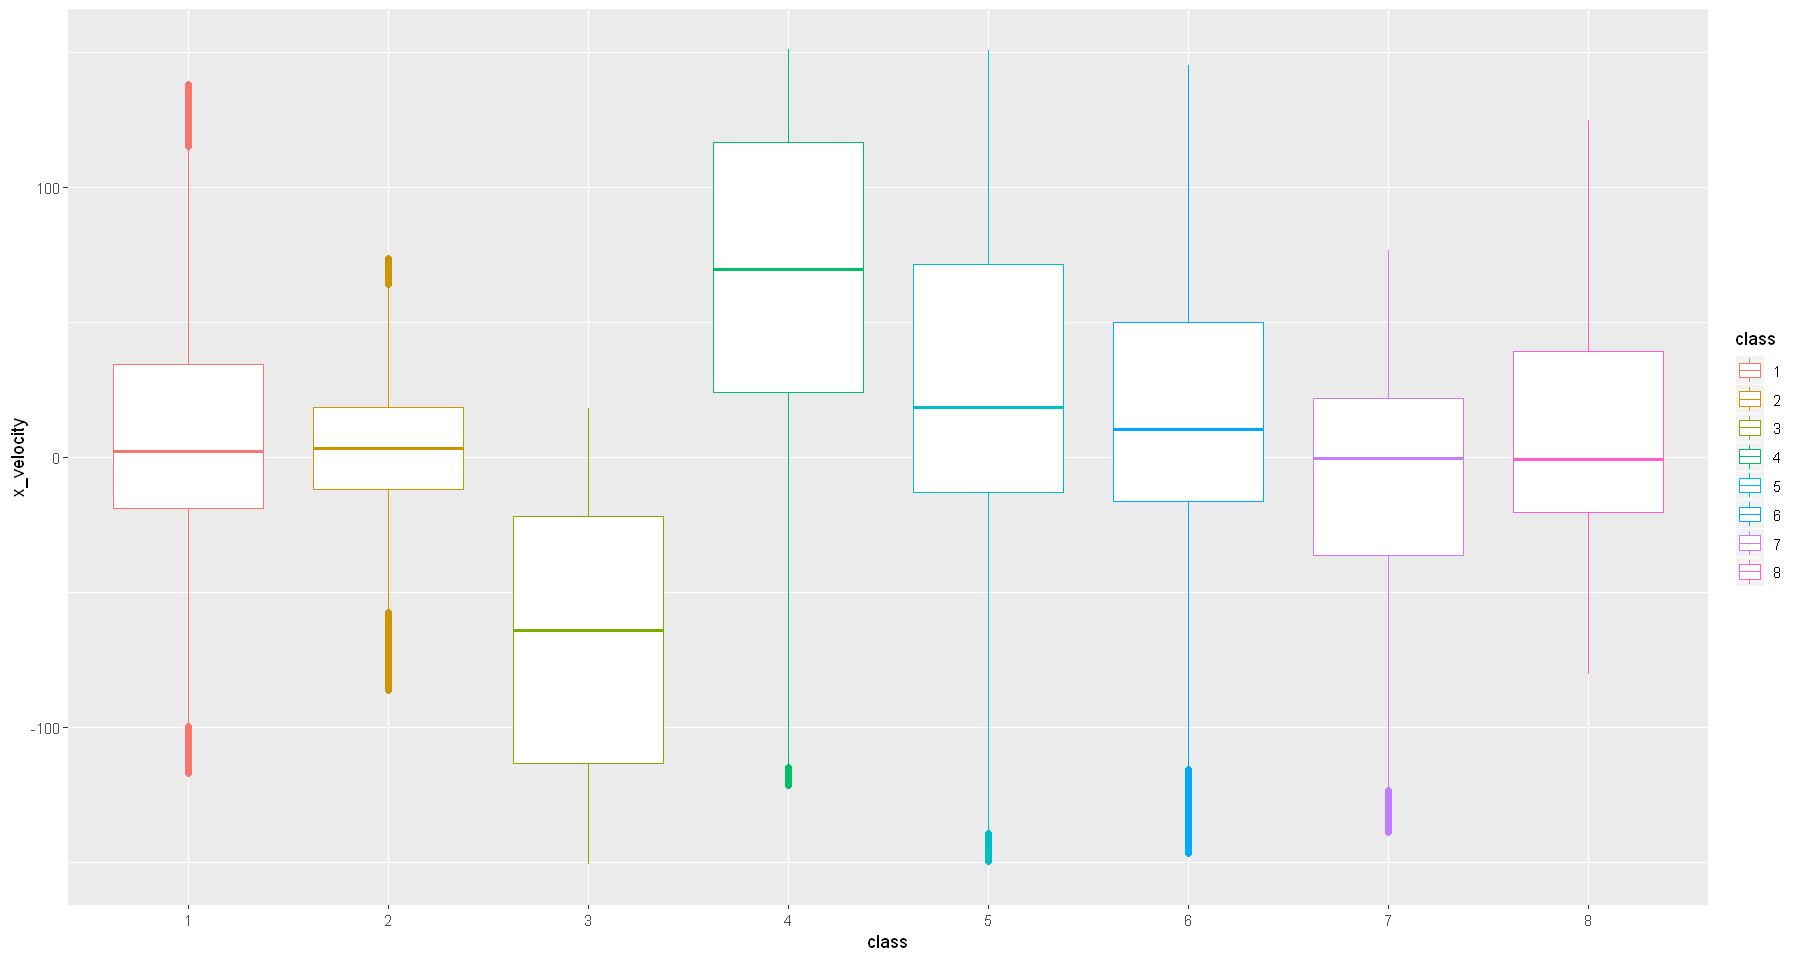

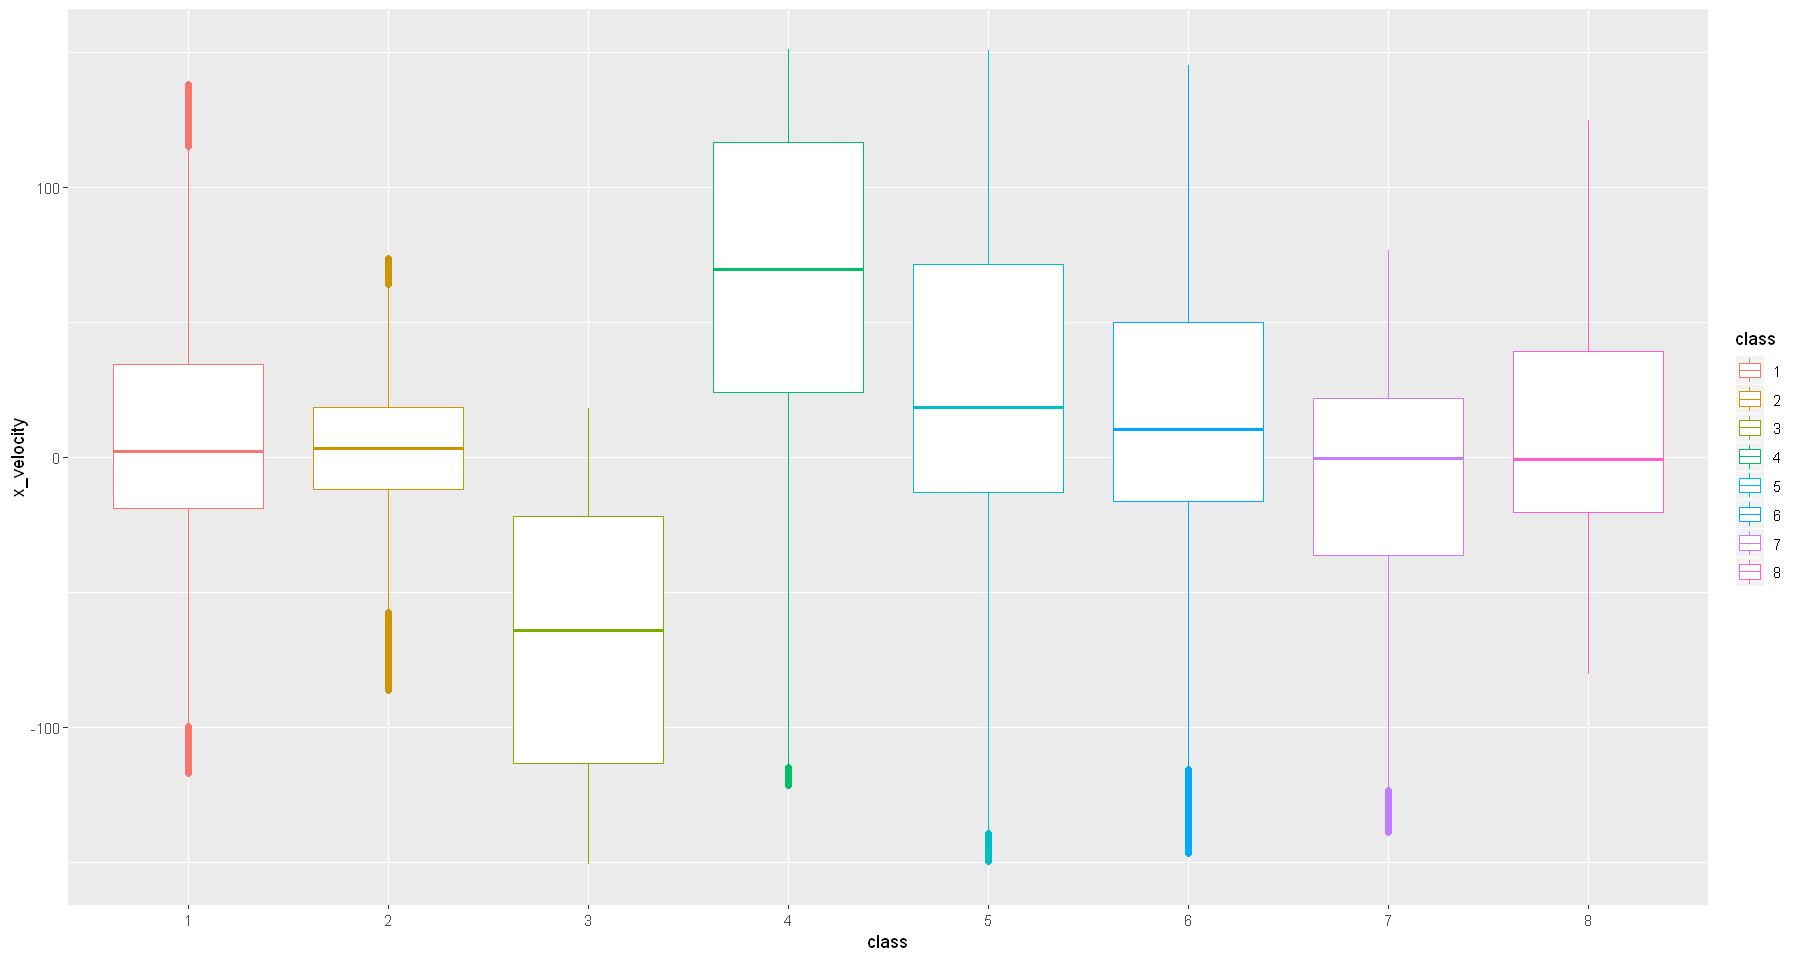

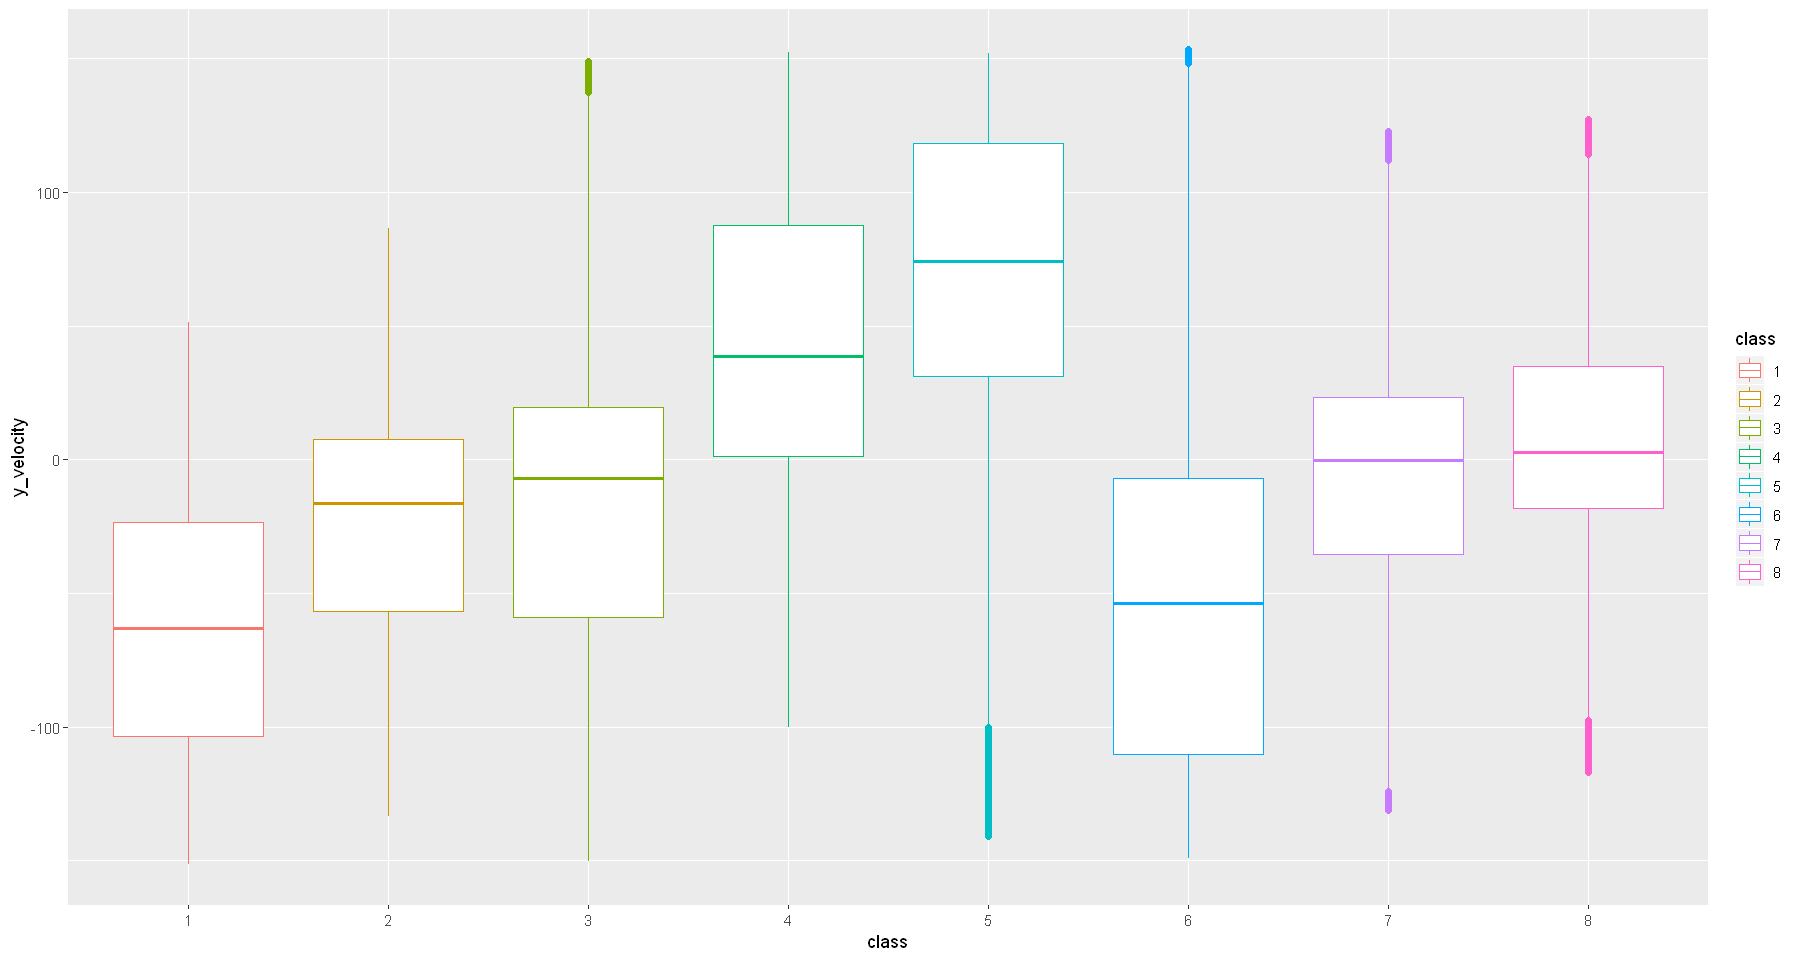

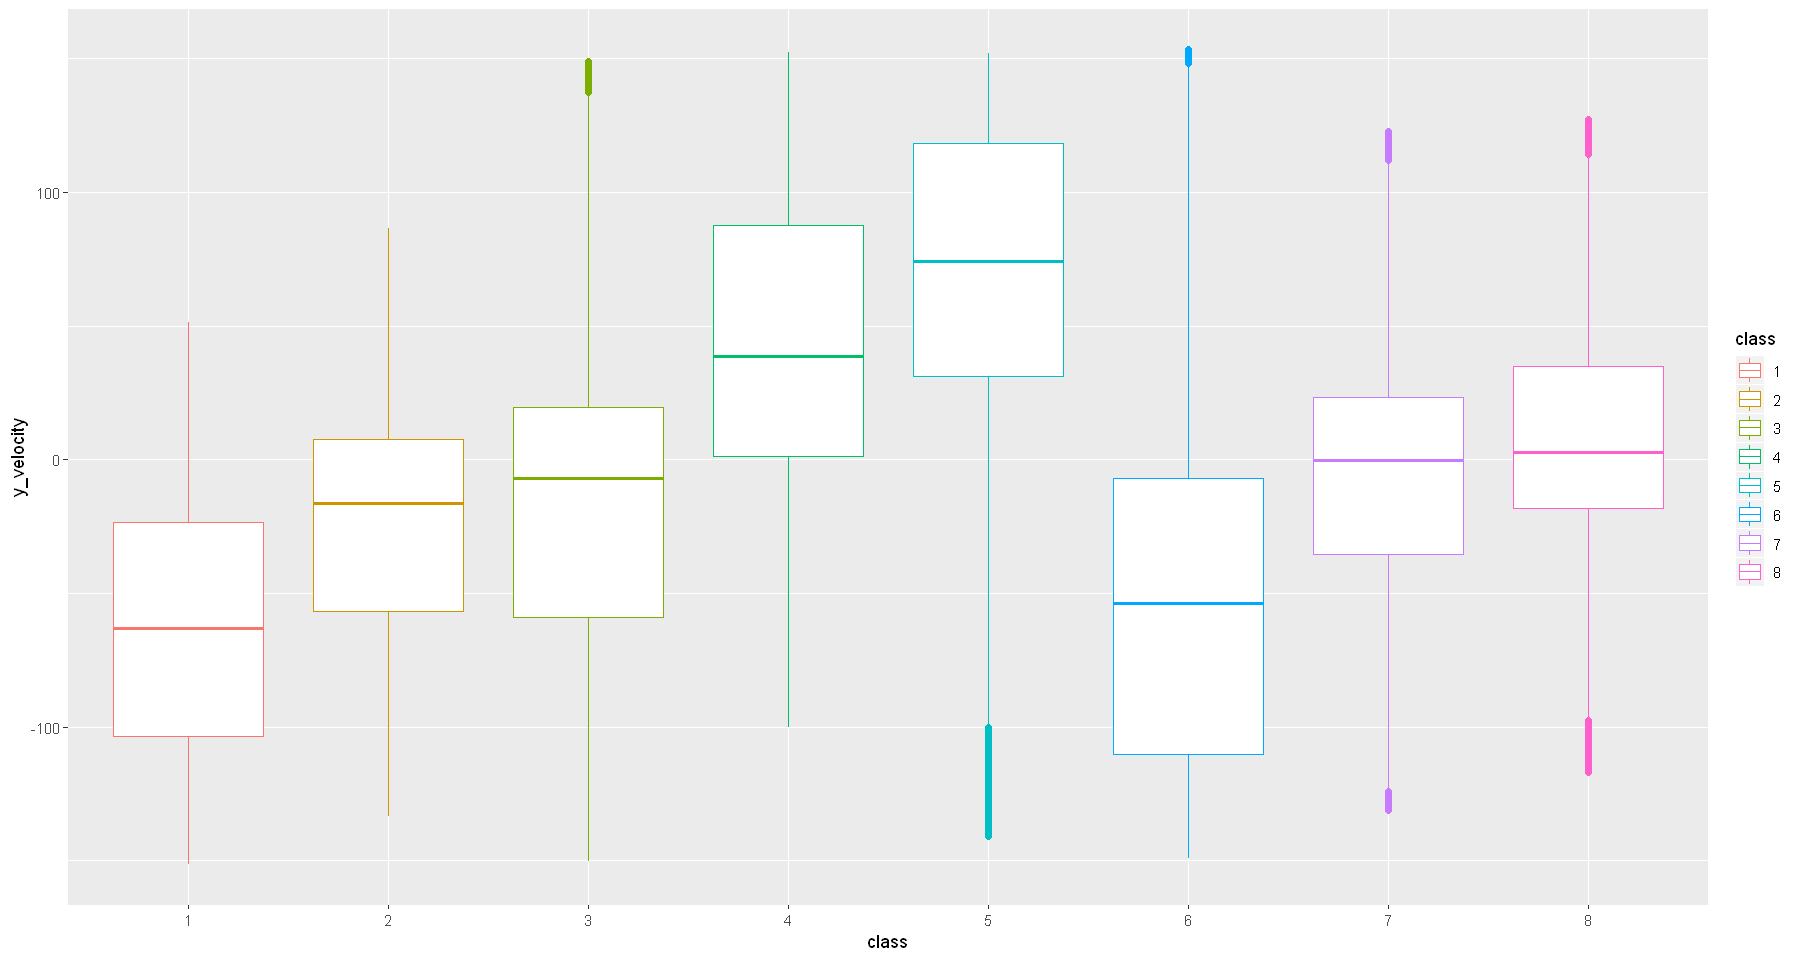

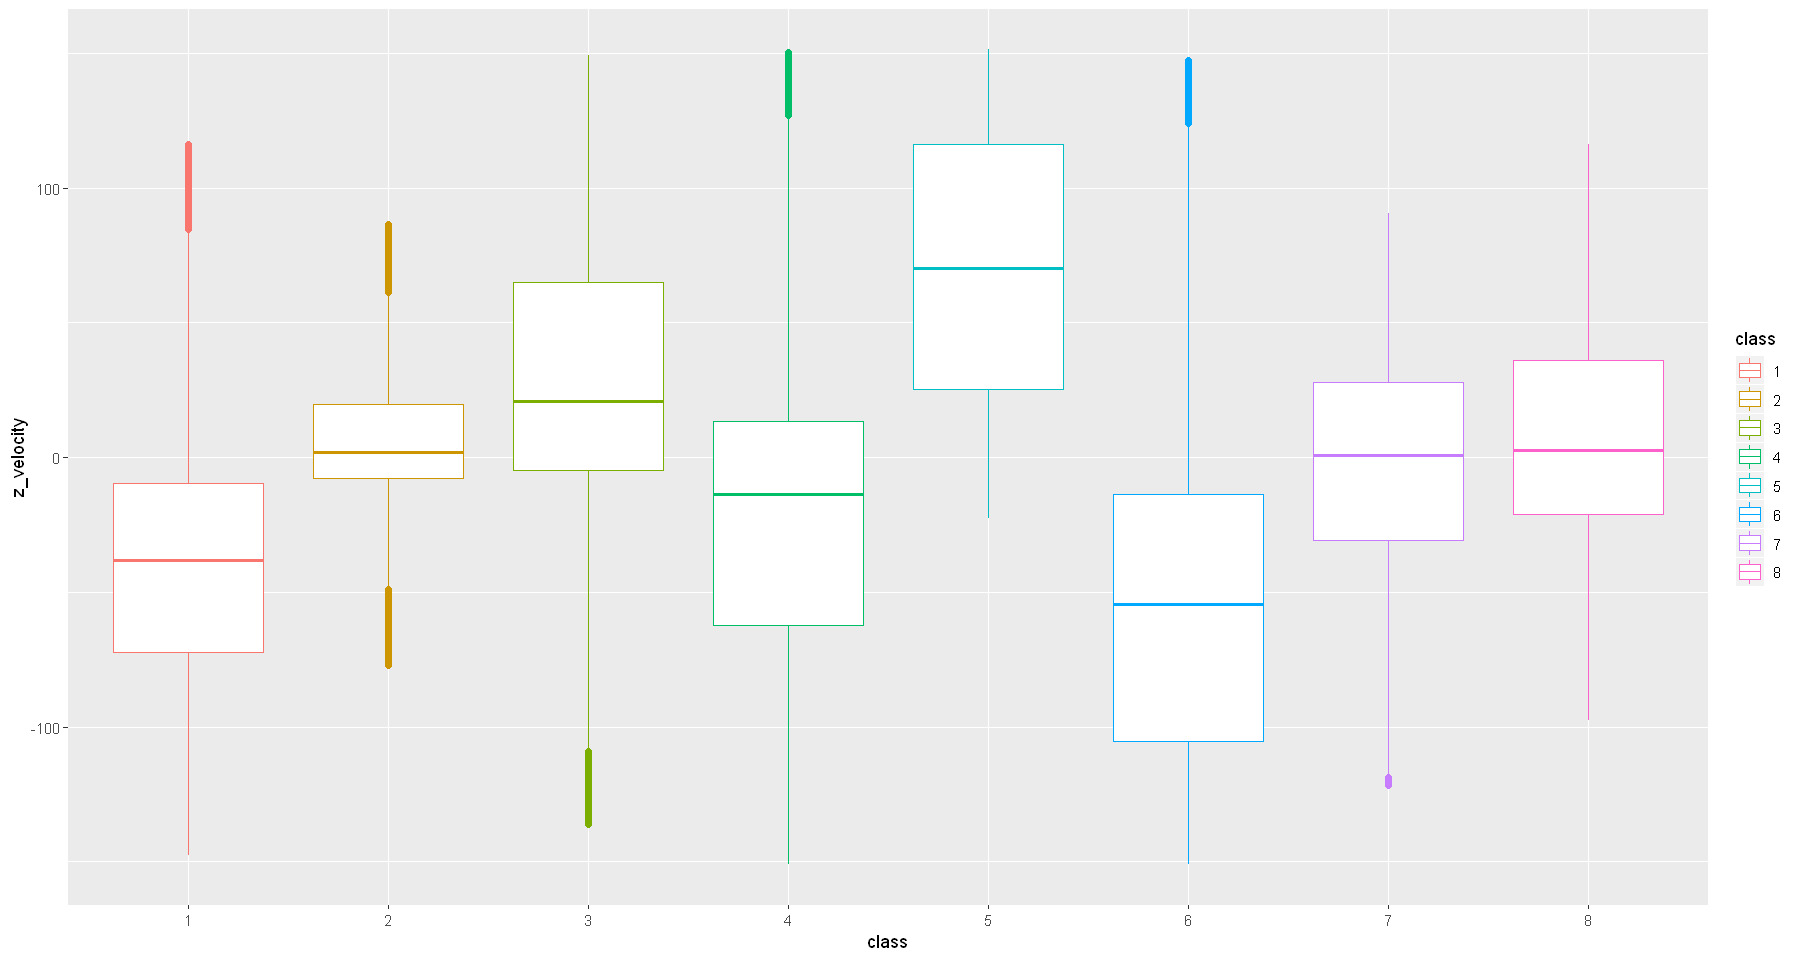

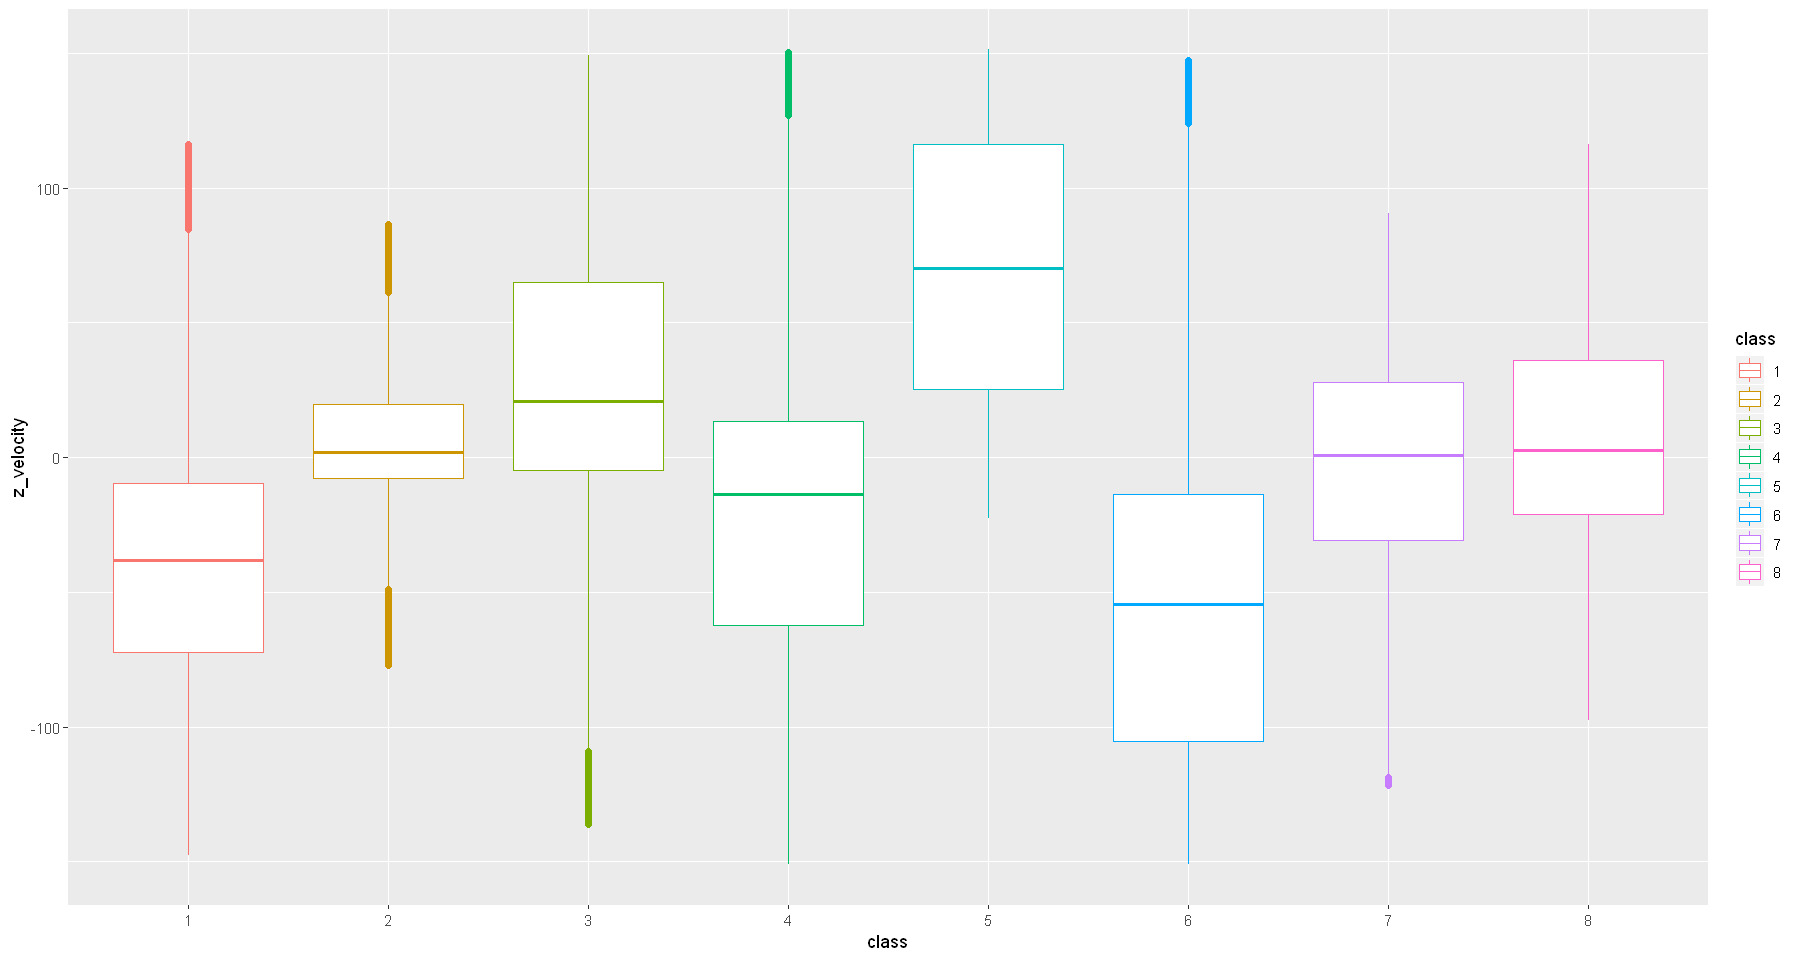

In [17]:
long_train[,"x_velocity"] <- cumsum(long_train$x_value)
long_train[,"y_velocity"] <- cumsum(long_train$y_value)
long_train[,"z_velocity"] <- cumsum(long_train$z_value)

ggplot(long_train, aes(x=class, y=x_velocity, color=class, main= "box plot of x velocities of classes")) +
  geom_boxplot()

ggplot(long_train, aes(x=class, y=y_velocity, color=class , main= "box plot of x velocities of classes")) +
  geom_boxplot()

ggplot(long_train, aes(x=class, y=z_velocity, color=class , main= "box plot of x velocities of classes")) +
  geom_boxplot()

And then I have looked the numeric data of these information observed by the box plots. Like I have mentioned the standard deviations are too high that it wont be correct for classification.

In [18]:
# calculate some stats for each series
stats=long_train[,list(x_velo_mean=mean(x_velocity),x_velo_median=median(x_velocity),x_velo_stdev=sd(x_velocity),
                       y_velo_mean=mean(x_velocity),y_velo_median=median(y_velocity),y_velo_stdev=sd(y_velocity),
                       z_velo_mean=mean(z_velocity),z_velo_median=median(z_velocity),z_velo_stdev=sd(z_velocity)),by=list(class,id)]
head(stats)
# mean and stdevs does not tell much stdev too high
summary(stats)

class,id,x_velo_mean,x_velo_median,x_velo_stdev,y_velo_mean,y_velo_median,y_velo_stdev,z_velo_mean,z_velo_median,z_velo_stdev
1,1,-5.967725,-1.273996,37.49578,-5.967725,-78.59336,39.66078,-21.39727,-15.511750,22.05936
1,2,29.776171,21.162870,45.59079,29.776171,-97.47897,39.28290,-32.57656,-33.533494,24.37261
1,3,14.603905,3.620767,28.77581,14.603905,-64.32897,40.83491,-34.05923,-13.784385,37.14145
1,4,24.334497,18.506212,22.75469,24.334497,-68.01275,33.89931,-23.53112,-6.189565,39.48803
1,5,5.912832,3.100841,32.67985,5.912832,-65.40221,41.40139,-62.65686,-65.090488,29.74928
1,6,-19.381919,-10.251890,42.12273,-19.381919,-94.40503,43.18154,-37.70652,-35.369242,27.33921


class,id,x_velo_mean,x_velo_median,x_velo_stdev,y_velo_mean,y_velo_median,y_velo_stdev,z_velo_mean,z_velo_median,z_velo_stdev
1,1,-5.967725,-1.273996,37.49578,-5.967725,-78.59336,39.66078,-21.39727,-15.511750,22.05936
1,2,29.776171,21.162870,45.59079,29.776171,-97.47897,39.28290,-32.57656,-33.533494,24.37261
1,3,14.603905,3.620767,28.77581,14.603905,-64.32897,40.83491,-34.05923,-13.784385,37.14145
1,4,24.334497,18.506212,22.75469,24.334497,-68.01275,33.89931,-23.53112,-6.189565,39.48803
1,5,5.912832,3.100841,32.67985,5.912832,-65.40221,41.40139,-62.65686,-65.090488,29.74928
1,6,-19.381919,-10.251890,42.12273,-19.381919,-94.40503,43.18154,-37.70652,-35.369242,27.33921


    class                 id         x_velo_mean      x_velo_median     
 Length:896         Min.   :  1.0   Min.   :-88.937   Min.   :-101.351  
 Class :character   1st Qu.:224.8   1st Qu.:-19.051   1st Qu.: -12.935  
 Mode  :character   Median :448.5   Median :  5.656   Median :   3.157  
                    Mean   :448.5   Mean   :  6.108   Mean   :   5.827  
                    3rd Qu.:672.2   3rd Qu.: 42.154   3rd Qu.:  33.835  
                    Max.   :896.0   Max.   : 89.074   Max.   : 102.133  
  x_velo_stdev     y_velo_mean      y_velo_median       y_velo_stdev  
 Min.   : 9.706   Min.   :-88.937   Min.   :-103.099   Min.   :14.99  
 1st Qu.:29.473   1st Qu.:-19.051   1st Qu.: -41.839   1st Qu.:36.94  
 Median :38.418   Median :  5.656   Median :  -4.901   Median :42.41  
 Mean   :36.443   Mean   :  6.108   Mean   :  -3.646   Mean   :40.70  
 3rd Qu.:44.868   3rd Qu.: 42.154   3rd Qu.:  33.872   3rd Qu.:45.69  
 Max.   :49.507   Max.   : 89.074   Max.   : 102.247   Max.   :

    class                 id         x_velo_mean      x_velo_median     
 Length:896         Min.   :  1.0   Min.   :-88.937   Min.   :-101.351  
 Class :character   1st Qu.:224.8   1st Qu.:-19.051   1st Qu.: -12.935  
 Mode  :character   Median :448.5   Median :  5.656   Median :   3.157  
                    Mean   :448.5   Mean   :  6.108   Mean   :   5.827  
                    3rd Qu.:672.2   3rd Qu.: 42.154   3rd Qu.:  33.835  
                    Max.   :896.0   Max.   : 89.074   Max.   : 102.133  
  x_velo_stdev     y_velo_mean      y_velo_median       y_velo_stdev  
 Min.   : 9.706   Min.   :-88.937   Min.   :-103.099   Min.   :14.99  
 1st Qu.:29.473   1st Qu.:-19.051   1st Qu.: -41.839   1st Qu.:36.94  
 Median :38.418   Median :  5.656   Median :  -4.901   Median :42.41  
 Mean   :36.443   Mean   :  6.108   Mean   :  -3.646   Mean   :40.70  
 3rd Qu.:44.868   3rd Qu.: 42.154   3rd Qu.:  33.872   3rd Qu.:45.69  
 Max.   :49.507   Max.   : 89.074   Max.   : 102.247   Max.   :